**Load packages:**

In [ ]:
import networkx
import scipy

In [ ]:
#Restart runtime after this cell is run
!pip uninstall networkx -y
!pip install networkx==2.7

Found existing installation: networkx 2.8.8
Uninstalling networkx-2.8.8:
  Successfully uninstalled networkx-2.8.8
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 3.8 MB/s 


In [ ]:
!pip uninstall scipy -y
!pip install scipy==1.8

Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Successfully uninstalled scipy-1.7.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.6 MB 1.2 MB/s 


In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install q keras==2.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Get a copy of the data to your own Google drive
Step 1. Use [this chrome app](https://script.google.com/macros/s/AKfycbxbGNGajrxv-HbX2sVY2OTu7yj9VvxlOMOeQblZFuq7rYm7uyo/exec) to copy the[ BBC News Summary](https://drive.google.com/drive/folders/1ZryN8xuRFi0LNYPS1zfZ43RsuW0L6lij?usp=share_link) folder that I shared with you to your own drive.  
Step 2. Put the copied folder in the exact path under your Google drive, i.e., ``` /content/drive/MyDrive/sharedata/BBC News Summary ```, so you collaborate with your team members and get graded subsequently.   

Step 3. <font color =red>0 project score </font> will be given for <font color =red>not following this folder configuration</font> in step 2.
(Our grader is not reponsible to figure out your own perferred Google folder configuration)

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

import keras
import re
from matplotlib import pyplot as plt
import tensorflow as tf
# from tensorflow.python.framework.ops import disable_eager_execution
# disable_eager_execution()
from keras.layers.regularization.spatial_dropout3d import Dropout

# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

# Grid search imports
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor

import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1 Mount the Google drive in preparation for data access
!pip install -U path.py
import numpy as np
import pandas as pd
import os
from path import Path
# from google.colab import drive
# drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a id='load_data'></a>

### Load the data

---



In [ ]:
corpus = []
corpus_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/News Articles/business')

for file_path in corpus_dir.files('*.txt'):
    with file_path.open(mode='rt', encoding='utf-8') as fp:
        lines = fp.read().splitlines()
        corpus.append([i for i in lines if i])

### Show what the first txt file looks like

In [ ]:
corpus[0]

['Circuit City gets takeover offer',
 'Circuit City Stores, the second-largest electronics retailer in the US, has received a $3.25bn (£1.7bn) takeover offer.',
 "The bid has come from Boston-based private investment firm Highfields Capital Management, which already owns 6.7% of Circuit City's shares. Shares in the retailer were up 19.6% at $17.04 in Tuesday morning trading in New York following the announcement. Highfield said that it intends to take the Virginia-based firm private.",
 '"Such a transformation would eliminate the public-company transparency into the company\'s operating strategy that is uniquely damaging in a highly competitive industry where Circuit City is going head-to-head with a tough and entrenched rival," Highfield said. One analyst suggested that a bidding battle may now begin for the company. Bill Armstrong, a retail analyst at CL King & Associates, said he expected to see other private investment firms come forward for Circuit City. The retailer is debt free 

<a name='how_many_data'></a>
### How many txt files are under your assigned folder?

In [ ]:
print('There are {} text files under my assigned folder'.format(len(corpus)))

There are 510 text files under my assigned folder


<a name='tokenize'></a>

### Tokenize all sentences in the give survey dataset with TFIDF.

- Start with default parameters.
- How many rows and columns are there in the resultant vectorized dataframe.


In [ ]:
tv = TfidfVectorizer()
corpus_flattened = []
for file_ in corpus:
  for entry in file_:
    for sentence in entry.split(". "):
      corpus_flattened.append(sentence)
tv.fit(corpus_flattened)
corpus_flattened = tv.transform(corpus_flattened)
df = pd.DataFrame(corpus_flattened.toarray(),
                          columns=tv.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df.shape
print("Rows:", df.shape[0], "\nColumns:", df.shape[1])

Rows: 8356 
Columns: 11883


In [ ]:
df.head(5)

000  000bn  004   01  011   03  037  03bn        04  0400  ...  zealand  \
0  0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.000000   0.0  ...      0.0   
1  0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.000000   0.0  ...      0.0   
2  0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.000000   0.0  ...      0.0   
3  0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.378567   0.0  ...      0.0   
4  0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.000000   0.0  ...      0.0   

   zephyr  zero  zeros  zheng  zinc  zoellick  zone  zones  zurich  
0     0.0   0.0    0.0    0.0   0.0       0.0   0.0    0.0     0.0  
1     0.0   0.0    0.0    0.0   0.0       0.0   0.0    0.0     0.0  
2     0.0   0.0    0.0    0.0   0.0       0.0   0.0    0.0     0.0  
3     0.0   0.0    0.0    0.0   0.0       0.0   0.0    0.0     0.0  
4     0.0   0.0    0.0    0.0   0.0       0.0   0.0    0.0     0.0  

[5 rows x 11883 columns]

<a name='stopwords'></a>

###Show the top words

- Visualize them with a bar chart with frequency in y axis and words in the x-axis
- You may selectively choose top words as the stop words for your processing needs

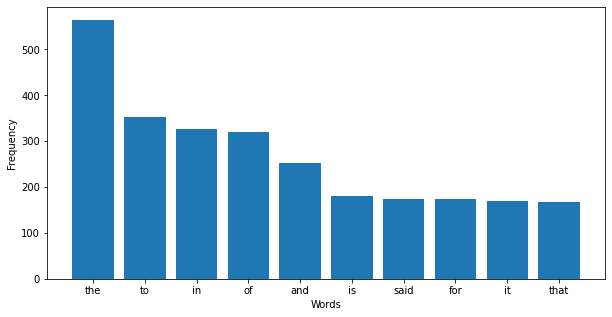

In [ ]:
#Block of code taken from NLP.ipynb
# get count of top-occurring words
top_words = {}
for i in df.columns:
    top_words[i] =  df[i].sum()
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))
plt.figure(figsize = (10, 5))
plt.xlabel("Words")
plt.ylabel("Frequency")

# visualize top 10 words
plt.bar(most_freq[0][:10], most_freq[1][:10]);

### After preprocessing the text, it is necessary to extract features and calculate the functions of the sentence, the results of which are vectors of several elements for each sentence. The elements of each vector take values in the interval [0, 1]. We consider the following features

In [ ]:
def convert_to_sentence(document,stop_words=[],lemmatize=False,stemming=False,remove_punction=[]):  
  document_flattened = []
  stemmer = SnowballStemmer("english")
  #print(document, "\n=============================\n")

  for entry in document:
    for sentence in re.split(r'\.(?=[A-Z])|\.\s|\n|\.\"', entry):
      #print((sentence))
      sentence = sentence.strip()
      if len(sentence)>= 1:
        for stop_word in stop_words:
          sentence = sentence.replace(stop_word[0].lower() + stop_word[1:],"")
          sentence = sentence.replace(stop_word[0].upper() + stop_word[1:],"")
        if lemmatize:
          for word in sentence.split(" "):
            sentence = sentence.replace(word, Word(word).lemmatize())
        if stemming:
          for word in sentence.split(" "):
            sentence = sentence.replace(word,stemmer.stem(word))
        for char in remove_punction:
          sentence = sentence.replace(char, "")
        if(len(sentence) >= 1):
          document_flattened.append(sentence)
  #print(document_flattened)
  return document_flattened

<a name='features'></a>
### Write a function for each of the features below that would return the feature score for any given sentence

<a name='title'></a>

### Title feature (F1)
It is defined as a ratio of the number of matches of the Title words (Tw) in the current sentence (S) to the number of words (w) of the Title (T)   

<img alt="F1" src="https://drive.google.com/uc?export=view&id=1J1GGrkuGcHhPlGRIo7xmPlwHLe0I2LcV">

In [ ]:
def F1(title, sentence):
  title_list = re.findall(r'[\w]+', title)
  title_set = set(title_list)
  sentence_set = set(re.findall(r'[\w]+', sentence))
  overlapping_words_set = title_set.intersection(sentence_set)
  return len(overlapping_words_set)/len(title_list)

def test_F1():
  title = 'Peugeot deal boosts Mitsubishi'
  sentence = 'Struggling Japanese car maker Mitsubishi Motors has struck a deal to supply French car maker Peugeot with 30,000 sports utility vehicles (SUV).'
  print(F1(title, sentence))

test_F1()

0.75


<a name='sentencelength'></a>

###Sentence Length (F2)
It is defined as a ratio of the number of words (w) in the current sentence (S) to the number of words in the longest sentence (LS) in the text.   

<img alt="F2" src="https://drive.google.com/uc?export=view&id=1b42IWpr5svaCyQl6fdnGNWaLP3Rv4bgK">

In [ ]:
def F2(sentence, document):
  longest_sentence_len = max([len(re.findall(r'[\w]+', s)) for s in document])
  current_sentence_len = len(re.findall(r'[\w]+', sentence))
  return current_sentence_len/longest_sentence_len

def test_F2():
  document = ['Fed warns of more US rate rises',  'The US looks set for a continued boost to interest rates in 2005, according to the Federal Reserve.',  'Minutes of the December meeting which pushed rates up to 2.25% showed that policy-makers at the Fed are worried about accelerating inflation.','The clear signal pushed the dollar up to $1.3270 to the euro by 0400 GMT on Wednesday, but depressed US shares.',  '"The markets are starting to fear a more aggressive Fed in 2005," said Richard Yamarone of Argus Research."',  'The Dow Jones index dropped almost 100 points on Tuesday, with the Nasdaq also falling as key tech stocks were hit by broker downgrades.',  'The dollar also gained ground against sterling on Tuesday, reaching $1.8832 to the pound before slipping slightly on Wednesday morning.',  'The release of the minutes just three weeks after the 14 December meeting was much faster than usual, indicating the Fed wants to keep markets more apprised of its thinking.',  'This, too, is being taken in some quarters as a sign of aggressive moves on interest rates to come.',  'The key Fed funds rate has risen 1.25 percentage points during 2004 from the 46-year low of 1% reached not long after the 9/11 attacks in 2001.',  'That long trough "might be contributing to signs of potentially excessive risk-taking in financial markets", said the Federal Open Markets Committee (FOMC), which sets interest rates.',  'The odds now favour a further boost to rates at the next meeting in early February, economists said.',  'But the respite for the dollar, which spent late 2003 being pushed lower against other major currencies by worries about massive US trade and budget deficits, may be short-lived.',  '"You can\'t rule out a further correction... but we don\'t think it\'s a change in direction in the dollar," said Jason Daw at Merrill Lynch. "Nothing fundamental has changed."']
  sentence = 'This, too, is being taken in some quarters as a sign of aggressive moves on interest rates to come.'

  print(F2(sentence, document))

test_F2()

0.59375


<a name='position'></a>

###Sentence position (F3)
It is defined as a maximum of the next two relations   

<img alt="F3" src="https://drive.google.com/uc?export=view&id=1WNqhFyRSkFR7RaGqtZaywOmQVBrUJyb0">


In [ ]:
#S is current sentence
def F3(document, sentence):
  pos = -1
  for index in range(0,len(document)):
    if document[index].lower() == sentence.lower():
      pos = index
      break
  return max(1/(pos+1),1/(len(document)-pos+2))

#document = convert_to_sentence(documents[0])
#for sentence in document:
  #print(F3(document,sentence))

<a name='termweight'></a>

###Term Weight (F5)
It is defined as a ratio of the sum of the frequencies of term occurrences (TO) in a sentence (S) to the sum of the frequency of term occurrences in the text.   

<img alt="F5" src="https://drive.google.com/uc?export=view&id=1wS8NV1otHFjgu4NePxkyPwQXFpZ4f93q">


In [ ]:
def F5(document, sentence):
  dictDocument = {}
  #listFreq = []
  sumSentence = 0
  sumDocument = 0
  for eachSentence in document:
    for word in eachSentence.split():
      #print(word)
      if dictDocument.get(word) == None:
        dictDocument[word] = 0 
      dictDocument[word] += 1
  #print(dictDocument)

  
  dict = {}
  for word in sentence.split():
    if word not in dict:
        dict[word] = 0 
    dict[word] += 1
    #print(dict)
  for key,value in dict.items():
    sumSentence+=value

  for key,value in dictDocument.items():
    sumDocument+=value

  termWeight = float(sumSentence/sumDocument);
  return sentence,termWeight

 
  #print(termWeight)

<a name='propernoun'></a>

###Proper Noun (F6):     
It is defined as a ratio of the number of proper nouns (PN) in a sentence (S) to the length (L) of a sentence

<img alt="F6" src="https://drive.google.com/uc?export=view&id=1MEBknA87K-vPSlu061F-hOz_c9aHrl6W">

In [ ]:
def F6(sentence):
  # split sentence by words, saving result in an array
  sentenceArr = sentence.split()

  # iterate over array, incrementing the variable PN whenever a proper noun is found (proper noun: starts with a capital letter)
  # does not count the first word in the sentence as a proper noun
  PN = -1 # number of proper nouns, initially -1 to account for the first term in a sentence always being capital
  for k in sentenceArr:
    x = k.upper() # uppercase version of k
    if x[0] == k[0]: # if first letters are the same, then the word was uppercase
      #print(k)
      PN += 1

  L = len(sentence) # length of a sentence
  if L > 0:
    resultValue = PN / L # take ratio of PN to L
  elif L <= 0:
    resultValue = 0
  return resultValue

<a name='numerical'></a>

###Numerical Data (F7)
 It is defined as a ratio of the number of numerical data (ND) in the sentence (S) to the length (L) of the sentence   

 <img alt="F7" src="https://drive.google.com/uc?export=view&id=1tCaSaipvqs3CvpvISyCR5ytNzDCuwJV5">


In [ ]:
def F7(sentence):
  words = sentence.split()
  contains_digit = lambda word: any(char.isdigit() for char in word)
  words_with_digit = [contains_digit(word) for word in words]
  num_nd = sum(words_with_digit)
  num_words = len(words)

  return num_nd / num_words

print(F7('ratio of number1 4.2 2'))

0.6


**Formula determining importance of the feature scores: (F1 * 3 + F2 * 2 + F3 * 2 + F5 * 2 + F6 * 2 + F7 * 1) / (3 + 2 + 2 + 2 + 2 + 1)**



<a name='validation'></a>

###Validation
Using the formula, this shows a one sentence summary of each of the given article in your assigned data folder.    

An interactive code below for users to enter a random number, say 42, and view the original article (042.txt) and the deduced matching one sentence summary


In [ ]:
# Prints a one-sentence summary for each and every article in our data folder
weight_1 = 3 
weight_2 = 2
weight_3 = 2
weight_5 = 2
weight_6 = 2
weight_7 = 1
#document_index = 5
#document = convert_to_sentence(corpus[document_index])
#title = corpus[document_index][0]
weights_total = weight_1 + weight_2 + weight_3 + weight_5 + weight_6 + weight_7
corpus_scores = []
index = 0
for item in (corpus):
  document = convert_to_sentence(item)
  #print(document)
  title = corpus[index][0]
  index +=1
  best_score = 0
  best_sentance = ""
  best_pos = -1
  myF1 = 0
  myF2 = 0
  myF3 = 0
  myF5 = 0
  myF6 = 0
  myF7 = 0
  #print(title, "\n==============")
  for sentence in document:
    best_pos +=1
    myF1 = F1(title, sentence)
    myF2 = F2(sentence, document)
    myF3 = F3(document, sentence)
    myF5 = F5(document,sentence)
    myF6 = F6(sentence)
    myF7 = F7(sentence)
    score = (myF1 * weight_1 + myF2 * weight_2 + myF3 * weight_3 + myF5[1] * weight_5+ myF6 * weight_6 + myF7 * weight_7)/weights_total
    if score > best_score:
      best_tuple = (score, best_pos, sentence, myF1, myF2, myF3, myF5[1], myF6, myF7)
      best_score = score
  corpus_scores.append(best_tuple)
    #print(((F1(title, sentence) * weight_1 + F2(sentence, document) * weight_2 + F3(document, sentence) * weight_3 + F6(sentence) * weight_6 + F7(sentence) * weight_7)/weights_total),sentence)

import pprint
pprint.pprint(corpus_scores)

[(0.44672918875927886,
  0,
  'Circuit City gets takeover offer',
  1.0,
  0.12195121951219512,
  1.0,
  0.02717391304347826,
  0.03125,
  0.0),
 (0.44405971976304454,
  0,
  'Peugeot deal boosts Mitsubishi',
  1.0,
  0.11764705882352941,
  1.0,
  0.013377926421404682,
  0.03333333333333333,
  0.0),
 (0.44584778565324484,
  0,
  'US gives foreign firms extra time',
  1.0,
  0.15789473684210525,
  1.0,
  0.017191977077363897,
  0.0,
  0.0),
 (0.45743587150706166,
  0,
  "Wembley firm won't make a profit",
  1.0,
  0.22580645161290322,
  1.0,
  0.018808777429467086,
  0.0,
  0.0),
 (0.4464055546510366,
  0,
  "Soaring oil 'hits world economy'",
  1.0,
  0.13513513513513514,
  1.0,
  0.012048192771084338,
  0.03125,
  0.0),
 (0.4467515594964382,
  0,
  'BMW cash to fuel Mini production',
  1.0,
  0.13953488372093023,
  1.0,
  0.009724473257698542,
  0.03125,
  0.0),
 (0.4438864087301588,
  0,
  'Dollar gains on Greenspan speech',
  1.0,
  0.11904761904761904,
  1.0,
  0.013020833333333334

In [ ]:
# function that scores a particular article, given its number
def score2(article_num, stop_words=[], lemmatize=False, stemming=False):
  #article_num = 42
  corpus_single = []
  corpus_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/News Articles/business')

  for file_path in corpus_dir.files(f'{article_num:03}.txt'):
      with file_path.open(mode='rt', encoding='utf-8') as fp:
          lines = fp.read().splitlines()
          corpus_single.append([i for i in lines if i])

  all_tuple = []
  document = convert_to_sentence(corpus_single[0],stop_words,lemmatize,stemming)
  title = corpus_single[0][0]

  best_score = 0
  best_sentance = ""
  best_pos = -1
  myF1 = 0
  myF2 = 0
  myF3 = 0
  myF5 = 0
  myF6 = 0
  myF7 = 0
  print('Article:')
  print('\n'.join(corpus_single[0]))
  print()
  for sentence in document:
    best_pos +=1
    myF1 = F1(title, sentence)
    myF2 = F2(sentence, document)
    myF3 = F3(document, sentence)
    myF5 = F5(document,sentence)
    myF6 = F6(sentence)
    myF7 = F7(sentence)
    score = (myF1 * weight_1 + myF2 * weight_2 + myF3 * weight_3 + myF5[1] * weight_5+ myF6 * weight_6 + myF7 * weight_7)/weights_total

    all_tuple.append((score, best_pos, sentence, myF1, myF2, myF3, myF5[1], myF6, myF7))
    if score > best_score:
      best_tuple = (score, best_pos, sentence, myF1, myF2, myF3, myF5[1], myF6, myF7)
      best_score = score


  return best_tuple
  #print()
  #print('===all_tuple===')
  #pprint.pprint(all_tuple)
#print('===best_tuple===')
#pprint.pprint(score(2))
score2(2)


Article:
Dollar gains on Greenspan speech
The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.
And Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He's taking a longer-term view, laying out a set of conditions unde

(0.4438864087301588,
 0,
 'Dollar gains on Greenspan speech',
 1.0,
 0.11904761904761904,
 1.0,
 0.013020833333333334,
 0.03125,
 0.0)

In [ ]:
# interactive code where user inputs an article number, and function prints out the original article, as well as the deduced one-sentence summary of that article.
user_input_number = int(input("Enter article number:"))
score2result = score2(user_input_number)
print("Deduced one-sentence summary: ", score2result[2])

Enter article number:4
Article:
High fuel prices hit BA's profits
British Airways has blamed high fuel prices for a 40% drop in profits.
Reporting its results for the three months to 31 December 2004, the airline made a pre-tax profit of £75m ($141m) compared with £125m a year earlier. Rod Eddington, BA's chief executive, said the results were "respectable" in a third quarter when fuel costs rose by £106m or 47.3%. BA's profits were still better than market expectation of £59m, and it expects a rise in full-year revenues.
To help offset the increased price of aviation fuel, BA last year introduced a fuel surcharge for passengers.
In October, it increased this from £6 to £10 one-way for all long-haul flights, while the short-haul surcharge was raised from £2.50 to £4 a leg. Yet aviation analyst Mike Powell of Dresdner Kleinwort Wasserstein says BA's estimated annual surcharge revenues - £160m - will still be way short of its additional fuel costs - a predicted extra £250m. Turnover for 

<a name='experiment'></a>
###Experimented with removing stopwords, lemmatization, and stemming options in vectorizing the given dataset.



In [ ]:
stop_words = most_freq[0][:10].array
convert_to_sentence(corpus[1],lemmatize=True,stemming=True)
#for item in (corpus):
all_scores = []
document = convert_to_sentence(item,stop_words)
params = [(stop_words, False, False), (stop_words, True, False), (stop_words, True, True), (stop_words,False,True), ([], True, True), ([],True, False), ([], False,True), ([],False,False)]
best_score = 0
best_index = -1
for index, param in enumerate(params):
  scores = score2(45, param[0], param[1],param[2])
  if scores[0] > best_score:
    best_score = scores[0]
    best_index = index
  all_scores.append(scores)
print("Index:", best_index, "\nBest Score:", best_score)
for score in all_scores:
  print(score[0],":", score[1])
#score(article_num, stop_words=[], lemmatize=False, stemming=False):


Article:
US crude prices surge above $53
US crude prices have soared to fresh four-month highs above $53 in the US as refinery problems propelled petrol prices to an all-time high.
US light sweet crude futures jumped to $53.09 a barrel in New York before closing at $53.03. The gains tracked a surge in US gasoline futures to a record high of $1.4850 a gallon. The jump followed a fire at Western Refining Company's refinery in Texas, which shut down petrol production. A spokesman for the group was unable to say when the production unit would be back up and running. "This market simply wants to go up," Citigroup Global Markets analyst Kyle Cooper told Reuters news agency. Ed Silliere, analyst at Energy Merchant, added: "Gasoline is up because of the refinery issues in Texas, which means there will be a scramble for product in the (US) Gulf Coast."
Elsewhere, a refinery in Houston was closed due to mechanical problems, while on Tuesday production at BP's Texas City refinery was taken down f

<BarContainer object of 8 artists>

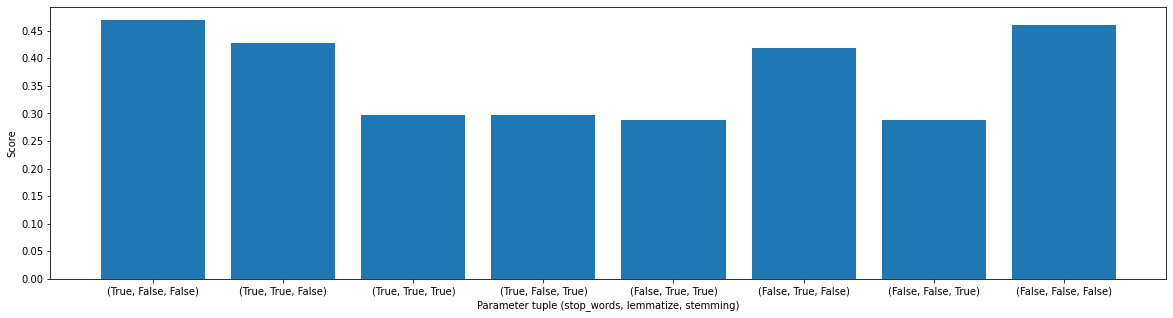

In [ ]:
# Bar graph of the scores
# top_words to dataframe sorted by highest occurance
score_df = pd.DataFrame(all_scores)
plt.figure(figsize = (20, 5))
plt.xlabel("Parameter tuple (stop_words, lemmatize, stemming)")
plt.ylabel("Score")

xAxis = []
for param in params:
  if len(param[0]) == 0:
    xAxis.append(str((False, param[1], param[2])))
  else:
    xAxis.append(str((True, param[1], param[2])))

plt.yticks(np.arange(0, 4, step=0.05))
# visualize scores
plt.bar(xAxis, score_df[0][:10])

In [ ]:
# Testing code for displaying F6 value (can be modified to display F5, or F7, etc) for a specific document
document_index = 10
corpus_scores = []
document = convert_to_sentence(corpus[document_index])
myF3 = 0
for sentence in document:
  myF3 = F3(document,sentence)
  best_tuple = (sentence, myF3)
  corpus_scores.append(best_tuple)

print(corpus[document_index])
print("DOC", document)

(corpus_scores.sort(key=lambda x:x[1], reverse=True)) # sorted by the myF6 element
corpus_scores[:5] # display first 5 elements

['Japanese banking battle at an end', "Japan's Sumitomo Mitsui Financial has withdrawn its takeover offer for rival bank UFJ Holdings, enabling the latter to merge with Mitsubishi Tokyo.", "Sumitomo bosses told counterparts at UFJ of its decision on Friday, clearing the way for it to conclude a 3 trillion yen ($29bn) deal with Mitsubishi. The deal would create the world's biggest bank with assets of about 189 trillion yen ($1.8 trillion). Sumitomo's exit ends the most high profile fight in Japanese bank history.", "UFJ Holdings, Japan's fourth-largest bank, has been at the centre of a fierce bid battle over the last year. Sumitomo, Japan's third-largest bank, tabled a higher offer for UFJ than its rival, valuing the company at $35bn.", 'However, UFJ\'s management was known to prefer the offer from Mitsubishi Tokyo Financial Group (MTFG), Japan\'s second-largest bank. Concerns were also raised about Sumitomo\'s ability to absorb UFJ and the former has now admitted defeat. "We believe th

[('Japanese banking battle at an end', 1.0),
 ("Japan's Sumitomo Mitsui Financial has withdrawn its takeover offer for rival bank UFJ Holdings, enabling the latter to merge with Mitsubishi Tokyo.",
  0.5),
 ('Sumitomo bosses told counterparts at UFJ of its decision on Friday, clearing the way for it to conclude a 3 trillion yen ($29bn) deal with Mitsubishi',
  0.3333333333333333),
 ('Japanese banks are increasingly seeking alliances to boost profits.',
  0.3333333333333333),
 ("The deal would create the world's biggest bank with assets of about 189 trillion yen ($1.8 trillion)",
  0.25)]

<a id='load_data'></a>

### Load the data

---

Import the assinged data into a pandas DataFrame.
(Extend the code below to access other files under your assigned folder)

In [ ]:
import nltk.data
!pip install -U path.py
import numpy as np
import pandas as pd
import os
from path import Path
nltk.download('punkt')
from google.colab import drive
drive.mount('/content/drive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Get all the articles from your assigned domain

In [ ]:
numFilesInFolder = 511 # 510 = total number of files in the folder. Set to 511 for loop to reach all files.

In [ ]:
import string

In [ ]:
documents_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/News Articles/business')
documents = []
for i in range (numFilesInFolder):
  for file_path in documents_dir.files(f'{i:03d}'+'.txt'):
      with file_path.open(mode='rt', encoding='utf-8') as fp:
        lines = fp.read().splitlines()
        documents.append(convert_to_sentence(lines,stop_words=[],lemmatize=False,stemming=False,remove_punction=string.punctuation))

        #print(lines, "\n=================================")
documents


[['Ad sales boost Time Warner profit',
  'Quarterly profits at US media giant TimeWarner jumped 76 to 113bn £600m for the three months to December from 639m yearearlier',
  'The firm which is now one of the biggest investors in Google benefited from sales of highspeed internet connections and higher advert sales',
  'TimeWarner said fourth quarter sales rose 2 to 111bn from 109bn',
  'Its profits were buoyed by oneoff gains which offset a profit dip at Warner Bros and less users for AOL',
  'Time Warner said on Friday that it now owns 8 of searchengine Google',
  'But its own internet business AOL had has mixed fortunes',
  'It lost 464000 subscribers in the fourth quarter profits were lower than in the preceding three quarters',
  'However the company said AOLs underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues',
  'It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to 

### Get the summary for your assigned domain

In [ ]:
# commented out code underneath because there's an infinite loop

summaries_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/Summaries/business')
summaries = []
for i in range (numFilesInFolder):
  for file_path in summaries_dir.files(f'{i:03d}'+'.txt'):
      with file_path.open(mode='rt', encoding='utf-8') as fp:
        lines = fp.read().splitlines()
        summaries.append(convert_to_sentence(lines,stop_words=[],lemmatize=False,stemming=False,remove_punction=string.punctuation))

        #print(lines, "\n=================================")
summaries


[['TimeWarner said fourth quarter sales rose 2 to 111bn from 109bn',
  'For the fullyear TimeWarner posted a profit of 336bn up 27 from its 2003 performance while revenues grew 64 to 4209bn',
  'Quarterly profits at US media giant TimeWarner jumped 76 to 113bn £600m for the three months to December from 639m yearearlier',
  'However the company said AOLs underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues',
  'Its profits were buoyed by oneoff gains which offset a profit dip at Warner Bros and less users for AOL',
  'For 2005 TimeWarner is projecting operating earnings growth of around 5 and also expects higher revenue and wider profit margins',
  'It lost 464000 subscribers in the fourth quarter profits were lower than in the preceding three quarters',
  'Time Warners fourth quarter profits were slightly better than analysts expectations'],
 ['The dollar has hit its highest level against the euro in almost three months after the Fede

<a name='extraction'></a>
### Extract sentences from the news articles and summaries

In [ ]:
sentences = []
summary = []
keys = []
for i in range(len(documents)):
  sentences += documents[i]
  summary += summaries[i]
  keys += documents[i][0].split()
print(len(sentences),len(summary))

8549 3407


<a name='tokenize_extraction'></a>
### Tokenize extracted sentences

In [ ]:
!pip install word2number
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
count = CountVectorizer(stop_words='english')
import pandas as pd
df = pd.DataFrame(sentences)

bag_of_words = count.fit_transform(df.squeeze())# transform df to a series
counts = pd.DataFrame(bag_of_words.toarray(),
                  columns=count.get_feature_names_out())
counts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=34d9475efca66bc776022165069d4c8d3e69bfe78fe75a66b9f131923c33706c
  Stored in directory: /root/.cache/pip/wheels/cb/f3/5a/d88198fdeb46781ddd7e7f2653061af83e7adb2a076d8886d6
Successfully built word2number


001  003  01  02  022  024  025  027  03  030  ...  zealand  zephyr  \
0       0    0   0   0    0    0    0    0   0    0  ...        0       0   
1       0    0   0   0    0    0    0    0   0    0  ...        0       0   
2       0    0   0   0    0    0    0    0   0    0  ...        0       0   
3       0    0   0   0    0    0    0    0   0    0  ...        0       0   
4       0    0   0   0    0    0    0    0   0    0  ...        0       0   
...   ...  ...  ..  ..  ...  ...  ...  ...  ..  ...  ...      ...     ...   
8544    0    0   0   0    0    0    0    0   0    0  ...        0       0   
8545    0    0   0   0    0    0    0    0   0    0  ...        0       0   
8546    0    0   0   0    0    0    0    0   0    0  ...        0       0   
8547    0    0   0   0    0    0    0    0   0    0  ...        0       0   
8548    0    0   0   0    0    0    0    0   0    0  ...        0       0   

      zero  zeros  zheng  zinc  zoellick  zone  zones  zurich  
0        0      0      0     0         0     0      0       0  
1        0      0      0     0         0     0      0       0  
2        0      0      0     0         0     0      0       0  
3        0      0      0     0         0     0      0       0  
4        0      0      0     0         0     0      0       0  
...    ...    ...    ...   ...       ...   ...    ...     ...  
8544     0      0      0     0         0     0      0       0  
8545     0      0      0     0         0     0      0       0  
8546     0      0      0     0         0     0      0       0  
8547     0      0      0     0         0     0      0       0  
8548     0      0      0     0         0     0      0       0  

[8549 rows x 13117 columns]

<a name='metric'></a>
### Define loss and metric functions

In [ ]:
def custom_loss3(y_true, y_pred):
  f_functions = y_true[:,:-1]
  weighted_avgs = tf.divide(tf.reduce_sum(tf.multiply(y_pred, f_functions), axis=1), tf.reduce_sum(y_pred, axis=1))
  return tf.abs(tf.subtract(weighted_avgs, y_true[:,-1]))

In [ ]:
def custom_metrics3(y_true, y_pred):
  f_functions = y_true[:,:-1]
  weighted_avgs = tf.divide(tf.reduce_sum(tf.multiply(y_pred, f_functions), axis=1), tf.reduce_sum(y_pred, axis=1))
  return tf.reduce_mean(tf.cast(tf.equal(y_true[:,-1], tf.round(weighted_avgs)), tf.float32))

In [ ]:
threshold = 0.3
def thresh_metrics3(y_true, y_pred):
  f_functions = y_true[:,:-1]
  weighted_avgs = tf.divide(tf.reduce_sum(tf.multiply(y_pred, f_functions), axis=1), tf.reduce_sum(y_pred, axis=1))
  return tf.reduce_mean(tf.cast(tf.equal(y_true[:,-1], tf.where(weighted_avgs > threshold, 1.0, 0.0)), tf.float32))

<a name='keras'></a>
### Build the Keras Neural Networks with the loss and metric functions

First prepare the input data, then build the neural network model

In [ ]:
# function that, given a document sentence and a document number, returns 1 if the sentence is contained in the corresponding summary, 0 if not
def in_summ(doc_sent, doc_num):
  summ = summaries[doc_num - 1]
  for summ_sent in summ:

    if doc_sent in summ_sent:
      return 1

  return 0

In [ ]:
# businessData: numpy.ndarray object that holds the X, or data. Data is just every sentence that appears in the regular articles? Tokenized sentence?
# OR is it a feature column, as in businessData = ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'] like from the linear regression colab
#In that case, calculate the six different F-scores for each existing sentence, then add that set of 6 F-scores as one element that looks like:
# ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'] into an array called businessData.
# Keep repeating until businessData looks like: array([['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], [........]])
businessData = []

# businessTarget: numpy.ndarray object that holds y, or target.
# Target is 0 or 1 for each sentence (0 = doesnt appear in summary, 1 = appears in summary), and sentences in this array/column should be in same order as in businessData.
businessTarget = []

# Fill businessData: loop through "documents" variable, where every document is an element, and each element (document) holds every sentence in that particular document.
# Then calculate F1, F2, F3, etc. scores for each sentence by passing in the current document # and the current sentence.
# Save the F1, F2, F3, F5, F6, F7 scores as in ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], add that element into businessData variable.
# Keep repeating until businessData looks like: array([['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], [........]])

docNum = 0 # represents document number, i.e a document number of 510 corresponds to 510.txt
for nextDoc in documents: # loop through documents
  docNum += 1
  title = nextDoc[0]
  for nextSent in nextDoc: # loop through sentences in current document
    #print(docNum, nextSent) # testing line to print every individual sentence, labeled by each sentence's document number, and any other info
    #print("title: ", title) # testing line. Currently (as of 11/26) title contains both the first line, and the line right after it, probably bc the lines are not separated by a '.'
    F1Score = F1(title, nextSent)
    F2Score = F2(nextSent, nextDoc)
    F3Score = F3(nextDoc, nextSent)
    F5Score = F5(nextDoc, nextSent)
    F6Score = F6(nextSent)
    F7Score = F7(nextSent)

    # save F1 scores into array. For F5Score, only take [1] because that's the numerical value returned. [0] is a sentence string.
    myFScores = [F1Score, F2Score, F3Score, F5Score[1], F6Score, F7Score]

    # add array of Fscores into businessData
    businessData.append(myFScores)

    # also determine whether current sentence appears in summary or not (corresponding to value of 1 or 0 respectively)
    myTargetVal = in_summ(nextSent, docNum)
    #print(myTargetVal, docNum, nextSent) #testing: print out current sentence, along with the targetValue that is 0 or 1, and the doc number
    businessTarget.append(myTargetVal) # add the 1 or 0 value into businessTarget

# convert businessData and businessTarget to numpy.ndarray objects
businessData = np.array(businessData)
businessTarget = np.array(businessTarget)

X_train, X_test, y_train, y_test = train_test_split(businessData, businessTarget, test_size=0.2)

In [ ]:
X_train

array([[0.        , 0.31707317, 0.2       , 0.03367876, 0.        ,
        0.        ],
       [0.        , 0.45238095, 0.07142857, 0.0321489 , 0.00909091,
        0.        ],
       [0.16666667, 0.53125   , 0.11111111, 0.04899135, 0.01851852,
        0.        ],
       ...,
       [0.        , 0.48717949, 0.25      , 0.04279279, 0.03571429,
        0.        ],
       [0.33333333, 0.76666667, 0.33333333, 0.08914729, 0.05072464,
        0.        ],
       [0.33333333, 0.61290323, 0.125     , 0.05993691, 0.03703704,
        0.05263158]])

In [ ]:
# Checking input
print(X_train.shape)
print(y_train.shape)

(6839, 6)
(6839,)


In [ ]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)
y_train.dtype

dtype('float64')

In [ ]:
# Create the feedforward model, with number of hidden layers
# will feed tokenized sentences into neural network
model = Sequential()
input_size = X_train.shape[1]

# note: maybe experiment with different kernel_initializer, other variables etc. to find best result
#layer1 = Dense(6, input_dim=6, kernel_initializer='uniform', activation='relu')
layer1 = Input(shape=(6,))
layer2 = Dense(6, kernel_initializer='uniform', activation='sigmoid')
layer3 = Dense(6, kernel_initializer='uniform', activation='sigmoid')

model.add(layer1) # first layer (input layer)
model.add(layer2) # second layer (hidden layer)
model.add(layer3) # third layer (output layer)

# (input_size*2)+1 = 13

model.compile(loss=custom_loss3, metrics=[custom_metrics3, thresh_metrics3], optimizer='adam') # compile model
# model.compile(loss=custom_loss_wrapper(layer1), metrics=[custom_metrics_wrapper(layer1), thresh_metrics_wrapper(layer1, 0.05)], optimizer='adam') # compile model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # TEST compile model; this line compiles with non-custom functions

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


<a name='training'></a>
### Train the model with summary data and find out the what each of the weights converge to

In [ ]:
data = pd.DataFrame()

data['f1'] = businessData[:,0]
data['f2'] = businessData[:,1]
data['f3'] = businessData[:,2]
data['f5'] = businessData[:,3]
data['f6'] = businessData[:,4]
data['f7'] = businessData[:,5]
data['target'] = businessTarget
# data['target_float'] = businessTarget.astype(float)
x = data[['f1','f2','f3','f5','f6','f7']]
y = data[['f1','f2','f3','f5','f6','f7','target']]
x = np.array(x)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# Checking input
print(X_train.shape)
print(y_train.shape)
print(y_train[:, 6].shape)

(6839, 6)
(6839, 7)
(6839,)


In [ ]:
data.describe()

f1           f2           f3           f5           f6  \
count  8549.000000  8549.000000  8549.000000  8549.000000  8549.000000   
mean      0.195932     0.576766     0.247271     0.059656     0.023297   
std       0.263304     0.234679     0.217729     0.032345     0.018908   
min       0.000000     0.025000     0.038462     0.002358    -0.037037   
25%       0.000000     0.409091     0.125000     0.035800     0.008850   
50%       0.166667     0.571429     0.166667     0.054893     0.021277   
75%       0.250000     0.750000     0.250000     0.077922     0.034247   
max       1.000000     1.000000     1.000000     0.251613     0.137931   

                f7       target  
count  8549.000000  8549.000000  
mean      0.033027     0.400983  
std       0.055994     0.490126  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.052632     1.000000  
max       0.428571     1.000000

In [ ]:
print(businessTarget.dtype)
print(y.dtype)
print(y_train.dtype)
print(y_test.dtype)

int64
float64
float64
float64


In [ ]:
print(y_test)

[[0.2        0.66666667 0.09090909 ... 0.04424779 0.         0.        ]
 [0.5        0.67647059 0.14285714 ... 0.04225352 0.         1.        ]
 [0.         0.171875   0.08333333 ... 0.015625   0.         0.        ]
 ...
 [0.16666667 0.51515152 0.11111111 ... 0.         0.         1.        ]
 [0.25       0.81481481 0.5        ... 0.01550388 0.         0.        ]
 [0.         0.31578947 0.16666667 ... 0.01470588 0.         0.        ]]


In [ ]:
print(y_test[:,:-1])

[[0.2        0.66666667 0.09090909 0.044      0.04424779 0.        ]
 [0.5        0.67647059 0.14285714 0.03560372 0.04225352 0.        ]
 [0.         0.171875   0.08333333 0.01344743 0.015625   0.        ]
 ...
 [0.16666667 0.51515152 0.11111111 0.04533333 0.         0.        ]
 [0.25       0.81481481 0.5        0.10328638 0.01550388 0.        ]
 [0.         0.31578947 0.16666667 0.05263158 0.01470588 0.        ]]


In [ ]:
print(y_test[:,-1])

[0. 1. 0. ... 1. 0. 0.]


In [ ]:
weights_per_epoch = []

class CustomCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    weights_per_epoch.append(model.predict(X_test[0:1])[0])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, callbacks=[CustomCallback()])

Epoch 1/50
35/35 [==============================] - 2s 17ms/step - loss: 0.4304 - custom_metrics3: 0.6006 - thresh_metrics3: 0.5582 - val_loss: 0.4320 - val_custom_metrics3: 0.5967 - val_thresh_metrics3: 0.5591
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4287 - custom_metrics3: 0.5988 - thresh_metrics3: 0.5510 - val_loss: 0.4304 - val_custom_metrics3: 0.5967 - val_thresh_metrics3: 0.5503
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4269 - custom_metrics3: 0.6024 - thresh_metrics3: 0.5496 - val_loss: 0.4289 - val_custom_metrics3: 0.5967 - val_thresh_metrics3: 0.5442
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4251 - custom_metrics3: 0.5959 - thresh_metrics3: 0.5510 - val_loss: 0.4272 - val_custom_metrics3: 0.5967 - val_thresh_metrics3: 0.5756
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4233 - custom_metrics3: 0.6000 - thresh_metrics3: 0.5893 - val_loss: 0.4257 - val_cus

<a name='weight_plots'></a>
### Plot each weights as training goes one similar to the following:

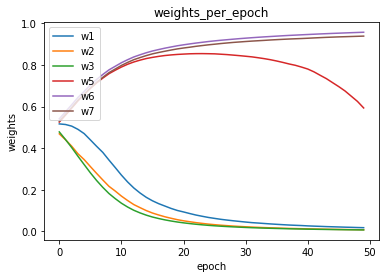

In [ ]:
# plt.plot(W1_F, label='W1')
# plt.plot(W2_F, label='W2')
#...
weights_per_epoch_np = np.array(weights_per_epoch)
plt.plot(weights_per_epoch_np[:,0])
plt.plot(weights_per_epoch_np[:,1])
plt.plot(weights_per_epoch_np[:,2])
plt.plot(weights_per_epoch_np[:,3])
plt.plot(weights_per_epoch_np[:,4])
plt.plot(weights_per_epoch_np[:,5])
plt.title('weights_per_epoch')
plt.ylabel('weights')
plt.xlabel('epoch')
plt.legend(['w1', 'w2', 'w3', 'w5', 'w6', 'w7'], loc='upper left')
plt.show()

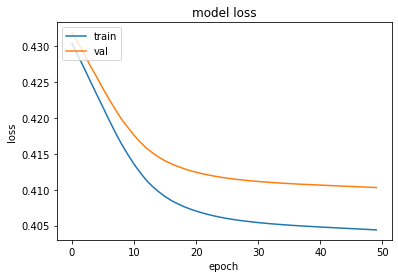

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

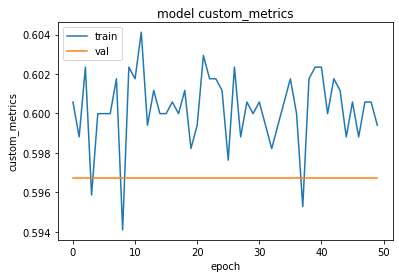

In [ ]:
plt.plot(history.history['custom_metrics3'])
plt.plot(history.history['val_custom_metrics3'])
plt.title('model custom_metrics')
plt.ylabel('custom_metrics')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

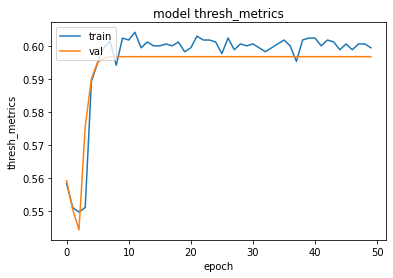

In [ ]:
plt.plot(history.history['thresh_metrics3'])
plt.plot(history.history['val_thresh_metrics3'])
plt.title('model thresh_metrics')
plt.ylabel('thresh_metrics')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
business_weighted_avgs = []
weights = model.predict(X_test[0:1])[0]
for row in range(len(businessData)):
  bus_weight_avg = np.sum(np.multiply(weights, businessData[row,:])) / np.sum(weights)
  business_weighted_avgs.append(bus_weight_avg)
# business_weighted_avgs

1/1 [==============================] - 0s 30ms/step


In [ ]:
rounded_avgs = np.round(business_weighted_avgs).astype(int)
rounded_avgs_series = pd.Series(rounded_avgs)
rounded_avgs_series.value_counts()

0    8549
dtype: int64

In [ ]:
weights

array([0.01796008, 0.0078978 , 0.00721763, 0.59331477, 0.9571581 ,
       0.9385729 ], dtype=float32)

In [ ]:
model.predict(X_test[0:5])

1/1 [==============================] - 0s 31ms/step


array([[0.01796008, 0.0078978 , 0.00721763, 0.59331477, 0.9571581 ,
        0.9385729 ],
       [0.01589412, 0.00682716, 0.00621769, 0.595944  , 0.9608961 ,
        0.9432067 ],
       [0.02496129, 0.01171161, 0.01080804, 0.58611894, 0.94521844,
        0.92417926],
       [0.01513046, 0.00643607, 0.00585339, 0.5970136 , 0.9623216 ,
        0.94498307],
       [0.01783707, 0.00783095, 0.00715624, 0.5934634 , 0.9573883 ,
        0.9388471 ]], dtype=float32)

### Repeat the process for 10 or more times and summarize what does each weight converge to in a table (or similar) below.


Epoch 1/50
35/35 [==============================] - 1s 11ms/step - loss: 0.4359 - custom_metrics3: 0.5918 - thresh_metrics3: 0.5482 - val_loss: 0.4134 - val_custom_metrics3: 0.6239 - val_thresh_metrics3: 0.5753
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4343 - custom_metrics3: 0.5918 - thresh_metrics3: 0.5458 - val_loss: 0.4112 - val_custom_metrics3: 0.6239 - val_thresh_metrics3: 0.5722
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4327 - custom_metrics3: 0.5930 - thresh_metrics3: 0.5417 - val_loss: 0.4090 - val_custom_metrics3: 0.6239 - val_thresh_metrics3: 0.5694
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4310 - custom_metrics3: 0.5912 - thresh_metrics3: 0.5528 - val_loss: 0.4066 - val_custom_metrics3: 0.6239 - val_thresh_metrics3: 0.6133
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4292 - custom_metrics3: 0.5924 - thresh_metrics3: 0.5846 - val_loss: 0.4043 - val_cus

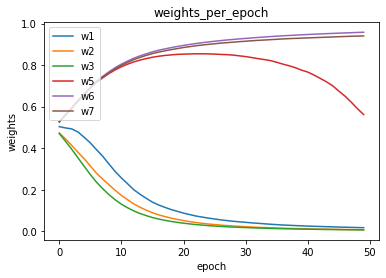

In [ ]:
# For this part of repeating the process 10 times, this block will be rerun for 10 or more times

# Create the feedforward model, with number of hidden layers
model = Sequential()
input_size = X_train.shape[1]

layer1 = Input(shape=(6,))
layer2 = Dense(6, kernel_initializer='uniform', activation='sigmoid')
layer3 = Dense(6, kernel_initializer='uniform', activation='sigmoid')

model.add(layer1) # first layer (input layer)
model.add(layer2) # second layer (hidden layer)
model.add(layer3) # third layer (output layer)

model.compile(loss=custom_loss3, metrics=[custom_metrics3, thresh_metrics3], optimizer='adam') # compile model

businessData = []
businessTarget = []
docNum = 0 # represents document number, i.e a document number of 510 corresponds to 510.txt
for nextDoc in documents: # loop through documents
  docNum += 1
  title = nextDoc[0]
  for nextSent in nextDoc: # loop through sentences in current document
    #print(docNum, nextSent) # testing line to print every individual sentence, labeled by each sentence's document number, and any other info
    #print("title: ", title) # testing line. Currently (as of 11/26) title contains both the first line, and the line right after it, probably bc the lines are not separated by a '.'
    F1Score = F1(title, nextSent)
    F2Score = F2(nextSent, nextDoc)
    F3Score = F3(nextDoc, nextSent)
    F5Score = F5(nextDoc, nextSent)
    F6Score = F6(nextSent)
    F7Score = F7(nextSent)

    # save F1 scores into array. For F5Score, only take [1] because that's the numerical value returned. [0] is a sentence string.
    myFScores = [F1Score, F2Score, F3Score, F5Score[1], F6Score, F7Score]

    # add array of Fscores into businessData
    businessData.append(myFScores)

    myTargetVal = in_summ(nextSent, docNum)
    businessTarget.append(myTargetVal) # add the 1 or 0 value into businessTarget

# convert businessData and businessTarget to numpy.ndarray objects
businessData = np.array(businessData)
businessTarget = np.array(businessTarget)

data = pd.DataFrame()
data['f1'] = businessData[:,0]
data['f2'] = businessData[:,1]
data['f3'] = businessData[:,2]
data['f5'] = businessData[:,3]
data['f6'] = businessData[:,4]
data['f7'] = businessData[:,5]
data['target'] = businessTarget
# data['target_float'] = businessTarget.astype(float)
x = data[['f1','f2','f3','f5','f6','f7']]
y = data[['f1','f2','f3','f5','f6','f7','target']]
x = np.array(x)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

weights_per_epoch = []

class CustomCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    weights_per_epoch.append(model.predict(X_test[0:1])[0])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, callbacks=[CustomCallback()])

weights_per_epoch_np = np.array(weights_per_epoch)
print("w1:", weights_per_epoch_np[-1,0])
print("w2:", weights_per_epoch_np[-1,1])
print("w3:", weights_per_epoch_np[-1,2])
print("w5:", weights_per_epoch_np[-1,3])
print("w6:", weights_per_epoch_np[-1,4])
print("w7:", weights_per_epoch_np[-1,5])

# plot
plt.plot(weights_per_epoch_np[:,0])
plt.plot(weights_per_epoch_np[:,1])
plt.plot(weights_per_epoch_np[:,2])
plt.plot(weights_per_epoch_np[:,3])
plt.plot(weights_per_epoch_np[:,4])
plt.plot(weights_per_epoch_np[:,5])
plt.title('weights_per_epoch')
plt.ylabel('weights')
plt.xlabel('epoch')
plt.legend(['w1', 'w2', 'w3', 'w5', 'w6', 'w7'], loc='upper left')
plt.show()

### Table of weight convergences (each row represents a separate run)
| w1      |  w2 | w3 | w5 |    w6 |      w7|
| --------- | -------- | -------- | ------- | -------- | ------- |
| 0.017141454      |  0.0076278774 | 0.006784477 | 0.478486 |    0.95507586 |      0.94014055|
| 0.01692321 |  0.006966536 | 0.006505289 | 0.48406205 |    0.95626 |      0.9385827|
| 0.014881109      |  0.0068867574 | 0.0067255627 | 0.51306015 |    0.95689833 |      0.94274294|
| 0.016443817      |  0.008458491 | 0.007895285 | 0.5271306 |    0.9484527 |      0.94123286|
| 0.013990458      |  0.006679601 | 0.0060282173 | 0.54340124 |    0.95977503 |      0.94659114|
| 0.018477326     |  0.008146125 | 0.007288432 | 0.3624909 |   0.95489794 |      0.94249016|
| 0.017471774      |  0.0076457113 | 0.0070855105| 0.36220026 |    0.95503575 |      0.9388144|
| 0.018501386      |  0.006679781| 0.0057635354 | 0.4996508 |   0.9577091|      0.9428684|
| 0.019819008      |  0.007930499 | 0.007225368 | 0.41745248 |    0.95536447|      0.9386017|
| 0.021632448    |  0.009413693 | 0.008034422 | 0.55889297|    0.9507959 |      0.92998797|


### Averages of the values from table above
| w1      |  w2 | w3 | w5 |    w6 |      w7|
| --------- | -------- | -------- | ------- | -------- | ------- |
| 0.017528199   |  0.00764350721 | 0.00693360989 | 0.474682745 |   0.955026508 |   0.940205282|

###Final table of the 10 runs with conclusion

| Experiment/Weight  | W1          | W2            | W3            | W5          | W6            | W7            |
|-------------|-------------|---------------|---------------|-------------|---------------|---------------|
| 1           |  Not Important  | Not Important | Not Important |  In between  | Important | Important |
| 2           |  Not Important  | Not Important | Not Important |  In between  | Important | Important |
| 3           |  Not Important  | Not Important | Not Important |  In between  | Important | Important |
| 4           |  Not Important  | Not Important | Not Important |  In between  | Important | Important |
| 5           |  Not Important  | Not Important | Not Important |  In between  | Important | Important |
| 6           |  Not Important  | Not Important | Not Important |  In between  | Important | Important |
| 7           |  Not Important  | Not Important | Not Important |  In between  | Important | Important |
| 8           |  Not Important  | Not Important | Not Important |  In between  | Important | Important |
| 9           |  Not Important  | Not Important | Not Important |  In between  | Important | Important |
| 10           |  Not Important  | Not Important | Not Important |  In between  | Important | Important |
|**Conclusion**           | **Not Important**  | **Not Important** | **Not Important**    |  **In between**  | **Important** | **Important** |


 The largest weights appear to be w6 and w7, which correspond to the features 'proper nouns' and 'numerical data' respectively. This makes sense, because it seems reasonable that numbers may be more relevant in a business theme. It also seems reasonable that proper nouns are more strongly associated with a good summary sentence.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
# Checking values
print(X_test.shape)
print(y_test.shape)

(1710, 6)
(1710, 7)


In [ ]:
y_pred = model.predict(X_test[0:1])[0]

1/1 [==============================] - 0s 18ms/step


In [ ]:
y_pred_avgs = []

for row in range(len(X_test)):
  y_pred_avg = np.sum(np.multiply(y_pred, X_test[row,:])) / np.sum(y_pred)
  y_pred_avgs.append(y_pred_avg)

In [ ]:
rounded_y_pred = [1 if avg > 0.03 else 0 for avg in y_pred_avgs]
y_true = y_test[:,-1].astype(int)

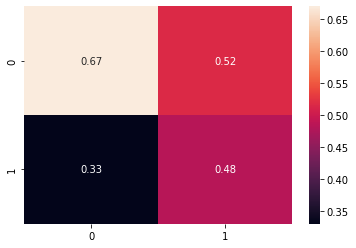

In [ ]:
result = confusion_matrix(y_true, rounded_y_pred , normalize='pred')
sns.heatmap(result, annot=True)

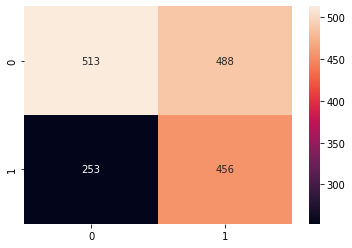

In [ ]:
result_No_normalize = confusion_matrix(y_true, rounded_y_pred)
sns.heatmap(result_No_normalize, annot=True, fmt='g')

In [ ]:
classification_report_our_model = classification_report(y_true, rounded_y_pred, output_dict=True)
print (classification_report(y_true, rounded_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58      1001
           1       0.48      0.64      0.55       709

    accuracy                           0.57      1710
   macro avg       0.58      0.58      0.57      1710
weighted avg       0.59      0.57      0.57      1710



**According to the last run, 48% of our representative sentences actually show up in the Summary section.**

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
precision_1,recall_1,fscore_1,support=score(y_true,rounded_y_pred,average='weighted')

<a name='grid'></a>
### Grid search with hyperparameter to find an optimal NN 


In [ ]:
# Checking input
print(X_train.shape)
print(y_train.shape)
print(y_train[:, 6].shape)

(6839, 6)
(6839, 7)
(6839,)


In [ ]:
X_train

array([[ 0.16666667,  0.85714286,  0.25      ,  0.10526316,  0.03333333,
         0.        ],
       [ 0.14285714,  0.85294118,  0.07692308,  0.05471698,  0.01081081,
         0.        ],
       [ 0.        ,  0.90625   ,  0.16666667,  0.09863946,  0.02538071,
         0.        ],
       ...,
       [ 0.        ,  0.38095238,  0.1       ,  0.03404255, -0.01086957,
         0.        ],
       [ 0.        ,  0.58064516,  0.5       ,  0.04904632,  0.03883495,
         0.22222222],
       [ 0.        ,  0.58974359,  0.5       ,  0.07876712,  0.        ,
         0.        ]])

In [ ]:
y_train

array([[ 0.16666667,  0.85714286,  0.25      , ...,  0.03333333,
         0.        ,  1.        ],
       [ 0.14285714,  0.85294118,  0.07692308, ...,  0.01081081,
         0.        ,  1.        ],
       [ 0.        ,  0.90625   ,  0.16666667, ...,  0.02538071,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.38095238,  0.1       , ..., -0.01086957,
         0.        ,  0.        ],
       [ 0.        ,  0.58064516,  0.5       , ...,  0.03883495,
         0.22222222,  1.        ],
       [ 0.        ,  0.58974359,  0.5       , ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
y_train[:, 6]

array([1., 1., 1., ..., 0., 1., 1.])

In [ ]:
# function for creating model, used for passing model into KerasClassifier
def create_model(activation='tanh', neurons=6):
  created_model = Sequential()
  input_size = X_train.shape[1]

  layer1 = Input(shape=(X_train.shape[1]))
  layer2 = Dense(neurons, kernel_initializer='uniform', activation=activation)
  layer3 = Dense(1, kernel_initializer='uniform', activation='sigmoid')

  created_model.add(layer1) # first layer (input layer)
  created_model.add(layer2) # second layer (hidden layer)
  created_model.add(layer3) # third layer (output layer)

  created_model.compile(loss=custom_loss3, metrics=[custom_metrics3, thresh_metrics3], optimizer='adam') # compile model
  #created_model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['accuracy']) # TEST
  return created_model

In [ ]:
#from sklearn.metrics import make_scorer

In [ ]:
#custom_scorer = make_scorer(thresh_metrics3, greater_is_better=False)

In [ ]:
# Gridsearch
# Input shapes:
# example X_train shape: (6839, 6)
# example y_train shape: (6839,)

wrapped_model = KerasClassifier(model=create_model, activation='tanh', verbose=0) # the input 'model' is our Keras sequential model

# define grid search parameters
# at least 4 parameters with 3 variations or more on each parameter

activation = ['sigmoid', 'relu', 'tanh'] # parameter: activation function
neurons = [4, 6, 12] # parameter: number of neurons (in the hidden layer)
learn_rate = [0.01, 0.1, 0.3] # parameter: different learning rates
epochs = [10, 30, 50] # parameter: number of epochs

# Below used for faster testing (replace with top 4 parameters in final version):
#activation = ['sigmoid'] # parameter: activation function
#neurons = [4] # parameter: number of neurons (in the hidden layer)
#learn_rate = [0.1] # parameter: different learning rates
#epochs = [10] # parameter: number of epochs

# put grid search parameters together
my_param_grid = dict(activation=activation, model__neurons=neurons, epochs=epochs, optimizer__learning_rate=learn_rate)

# might take a while to run if you use all the parameters
grid = GridSearchCV(estimator=wrapped_model, param_grid=my_param_grid, n_jobs=-1, cv=3, error_score ='raise')
grid_result = grid.fit(X_train, y_train[:, 6]) # fit(X, Y)
#grid_result = grid.fit(X_train, y_train) # fit(X, Y)

# Print best score with best params
print("Best score of %f with params %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

# Print more stats
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best score of 0.602427 with params {'activation': 'sigmoid', 'epochs': 10, 'model__neurons': 4, 'optimizer__learning_rate': 0.01}
0.602 (+/-0.000) for {'activation': 'sigmoid', 'epochs': 10, 'model__neurons': 4, 'optimizer__learning_rate': 0.01}
0.466 (+/-0.193) for {'activation': 'sigmoid', 'epochs': 10, 'model__neurons': 4, 'optimizer__learning_rate': 0.1}
0.601 (+/-0.004) for {'activation': 'sigmoid', 'epochs': 10, 'model__neurons': 4, 'optimizer__learning_rate': 0.3}
0.534 (+/-0.193) for {'activation': 'sigmoid', 'epochs': 10, 'model__neurons': 6, 'optimizer__learning_rate': 0.01}
0.534 (+/-0.193) for {'activation': 'sigmoid', 'epochs': 10, 'model__neurons': 6, 'optimizer__learning_rate': 0.1}
0.534 (+/-0.193) for {'activation': 'sigmoid', 'epochs': 10, 'model__neurons': 6, 'optimizer__learning_rate': 0.3}
0.466 (+/-0.193) for {'activation': 'sigmoid', 'epochs': 10, 'model__neurons': 12, 'optimizer__learning_rate': 0.01}
0.534 (+/-0.193) for {'activation': 'sigmoid', 'epochs': 10, 

**From the last run, the optimal parameter set (and the optimal results) was displayed in the printout: Best score of 0.602427 with params {'activation': 'sigmoid', 'epochs': 10, 'model__neurons': 4, 'optimizer__learning_rate': 0.01}**

In [ ]:
from keras import backend as myKeras

In [ ]:
# Checking values
print(X_test.shape)
print(y_test.shape)

(1710, 6)
(1710, 7)


In [ ]:
# Equivalent code to calling create_model with parameters activation='sigmoid' and neurons=4
optimal_model = Sequential()
input_size = X_train.shape[1]

layer1 = Input(shape=(6,))
layer2 = Dense(4, kernel_initializer='uniform', activation='sigmoid')
layer3 = Dense(6, kernel_initializer='uniform', activation='sigmoid')

optimal_model.add(layer1) # first layer (input layer)
optimal_model.add(layer2) # second layer (hidden layer)
optimal_model.add(layer3) # third layer (output layer)

optimal_model.compile(loss=custom_loss3, metrics=[custom_metrics3, thresh_metrics3], optimizer='adam') # compile model

In [ ]:
# code for optimal model, found with GridSearch. Using sigmoid activation, and 4 model_neurons
#optimal_model = create_model(activation='sigmoid', neurons=4)

myKeras.set_value(optimal_model.optimizer.learning_rate, 0.01) # learning rate to 0.01
optimal_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200) # fit with 10 epochs

Epoch 1/10
35/35 [==============================] - 1s 10ms/step - loss: 0.4303 - custom_metrics3: 0.5912 - thresh_metrics3: 0.5681 - val_loss: 0.3979 - val_custom_metrics3: 0.6239 - val_thresh_metrics3: 0.6239
Epoch 2/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4196 - custom_metrics3: 0.5936 - thresh_metrics3: 0.5936 - val_loss: 0.3873 - val_custom_metrics3: 0.6239 - val_thresh_metrics3: 0.6239
Epoch 3/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4146 - custom_metrics3: 0.5942 - thresh_metrics3: 0.5942 - val_loss: 0.3832 - val_custom_metrics3: 0.6239 - val_thresh_metrics3: 0.6239
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4129 - custom_metrics3: 0.5918 - thresh_metrics3: 0.5918 - val_loss: 0.3821 - val_custom_metrics3: 0.6239 - val_thresh_metrics3: 0.6239
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4124 - custom_metrics3: 0.5895 - thresh_metrics3: 0.5895 - val_loss: 0.3815 - val_cus

In [ ]:
# perform predictions using optimal model

y_pred = optimal_model.predict(X_test[0:1])[0]
y_pred_avgs = []

for row in range(len(X_test)):
  y_pred_avg = np.sum(np.multiply(y_pred, X_test[row,:])) / np.sum(y_pred)
  y_pred_avgs.append(y_pred_avg)

rounded_y_pred = [1 if avg > 0.03 else 0 for avg in y_pred_avgs]
y_true = y_test[:,-1].astype(int)

1/1 [==============================] - 0s 44ms/step


In [ ]:
# Classification report, F1 score
print (classification_report(y_true, rounded_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1069
           1       0.45      0.42      0.43       641

    accuracy                           0.59      1710
   macro avg       0.56      0.56      0.56      1710
weighted avg       0.59      0.59      0.59      1710




### Below is the stop_words implementation for each model

In [ ]:
#Block of code taken from NLP.ipynb
# get count of top-occurring words
def get_top_words(df, x_words):
  top_words = {}
  for i in df.columns:
      top_words[i] =  df[i].sum()
  # top_words to dataframe sorted by highest occurance
  most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))
  plt.figure(figsize = (10, 5))
  plt.xlabel("Words")
  plt.ylabel("Frequency")

  # visualize top 10 words
  plt.bar(most_freq[0][:x_words], most_freq[1][:x_words]);
  return most_freq[0]

0            said
1            year
2              mr
3          market
4             new
           ...   
13112         zdf
13113      zephyr
13114       zheng
13115        zinc
13116    zoellick
Name: 0, Length: 13117, dtype: object


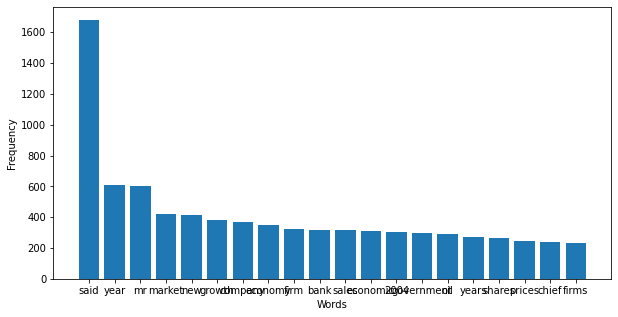

In [ ]:
top_words = (get_top_words(counts, 20))
print(top_words)

In [ ]:
# commented out code underneath because there's an infinite loop

documents_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/News Articles/business')
documents = []
for i in range (numFilesInFolder):
  for file_path in documents_dir.files(f'{i:03d}'+'.txt'):
      with file_path.open(mode='rt', encoding='utf-8') as fp:
        lines = fp.read().splitlines()
        documents.append(convert_to_sentence(lines,stop_words=top_words[:20],lemmatize=False,stemming=False,remove_punction=string.punctuation))

        #print(lines, "\n=================================")
documents


[['Ad  boost Time Warner profit',
  'Quarterly profits at US media giant TimeWarner jumped 76 to 113bn £600m for the three months to December from 639m earlier',
  'The  which is now one of the biggest investors in Google benefited from  of highspeed internet connections and higher advert ',
  'TimeWarner  fourth quarter  rose 2 to 111bn from 109bn',
  'Its profits were buoyed by oneoff gains which offset a profit dip at Warner Bros and less users for AOL',
  'Time Warner  on Friday that it now owns 8 of searchengine Google',
  'But its own internet business AOL had has mixed fortunes',
  'It lost 464000 subscribers in the fourth quarter profits were lower than in the preceding three quarters',
  'However the   AOLs underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues',
  'It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOLs existing customers for highspeed b

In [ ]:
# commented out code underneath because there's an infinite loop

summaries_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/Summaries/business')
summaries = []
for i in range (numFilesInFolder):
  for file_path in summaries_dir.files(f'{i:03d}'+'.txt'):
      with file_path.open(mode='rt', encoding='utf-8') as fp:
        lines = fp.read().splitlines()
        summaries.append(convert_to_sentence(lines,stop_words=top_words[:20],lemmatize=False,stemming=False,remove_punction=string.punctuation))

        #print(lines, "\n=================================")
summaries


[['TimeWarner  fourth quarter  rose 2 to 111bn from 109bn',
  'For the full TimeWarner posted a profit of 336bn up 27 from its 2003 performance while revenues grew 64 to 4209bn',
  'Quarterly profits at US media giant TimeWarner jumped 76 to 113bn £600m for the three months to December from 639m earlier',
  'However the   AOLs underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues',
  'Its profits were buoyed by oneoff gains which offset a profit dip at Warner Bros and less users for AOL',
  'For 2005 TimeWarner is projecting operating earnings  of around 5 and also expects higher revenue and wider profit margins',
  'It lost 464000 subscribers in the fourth quarter profits were lower than in the preceding three quarters',
  'Time Warners fourth quarter profits were slightly better than analysts expectations'],
 ['The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head  the US trade def

In [ ]:
# businessData: numpy.ndarray object that holds the X, or data. Data is just every sentence that appears in the regular articles? Tokenized sentence?
# OR is it a feature column, as in businessData = ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'] like from the linear regression colab
#In that case, calculate the six different F-scores for each existing sentence, then add that set of 6 F-scores as one element that looks like:
# ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'] into an array called businessData.
# Keep repeating until businessData looks like: array([['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], [........]])
businessData = []

# businessTarget: numpy.ndarray object that holds y, or target.
# Target is 0 or 1 for each sentence (0 = doesnt appear in summary, 1 = appears in summary), and sentences in this array/column should be in same order as in businessData.
businessTarget = []

# Fill businessData: loop through "documents" variable, where every document is an element, and each element (document) holds every sentence in that particular document.
# Then calculate F1, F2, F3, etc. scores for each sentence by passing in the current document # and the current sentence.
# Save the F1, F2, F3, F5, F6, F7 scores as in ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], add that element into businessData variable.
# Keep repeating until businessData looks like: array([['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], [........]])

docNum = 0 # represents document number, i.e a document number of 510 corresponds to 510.txt
for nextDoc in documents: # loop through documents
  docNum += 1
  title = nextDoc[0]
  for nextSent in nextDoc: # loop through sentences in current document
    #print(docNum, nextSent) # testing line to print every individual sentence, labeled by each sentence's document number, and any other info
    #print("title: ", title) # testing line. Currently (as of 11/26) title contains both the first line, and the line right after it, probably bc the lines are not separated by a '.'
    F1Score = F1(title, nextSent)
    F2Score = F2(nextSent, nextDoc)
    F3Score = F3(nextDoc, nextSent)
    F5Score = F5(nextDoc, nextSent)
    F6Score = F6(nextSent)
    F7Score = F7(nextSent)

    # save F1 scores into array. For F5Score, only take [1] because that's the numerical value returned. [0] is a sentence string.
    myFScores = [F1Score, F2Score, F3Score, F5Score[1], F6Score, F7Score]

    # add array of Fscores into businessData
    businessData.append(myFScores)

    # also determine whether current sentence appears in summary or not (corresponding to value of 1 or 0 respectively)
    myTargetVal = in_summ(nextSent, docNum)
    #print(myTargetVal, docNum, nextSent) #testing: print out current sentence, along with the targetValue that is 0 or 1, and the doc number
    businessTarget.append(myTargetVal) # add the 1 or 0 value into businessTarget

# convert businessData and businessTarget to numpy.ndarray objects
businessData = np.array(businessData)
businessTarget = np.array(businessTarget)

X_train, X_test, y_train, y_test = train_test_split(businessData, businessTarget, test_size=0.2)

In [ ]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)
y_train.dtype

dtype('float64')

In [ ]:
businessTarget_series = pd.Series(businessTarget)
businessTarget_series.value_counts()

0    5121
1    3428
dtype: int64

In [ ]:
data = pd.DataFrame()

data['f1'] = businessData[:,0]
data['f2'] = businessData[:,1]
data['f3'] = businessData[:,2]
data['f5'] = businessData[:,3]
data['f6'] = businessData[:,4]
data['f7'] = businessData[:,5]
data['target'] = businessTarget
# data['target_float'] = businessTarget.astype(float)
x = data[['f1','f2','f3','f5','f6','f7']]
y = data[['f1','f2','f3','f5','f6','f7','target']]
x = np.array(x)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Model with F scores as input

In [ ]:
# Create the feedforward model, with number of hidden layers
# will feed tokenized sentences into neural network
model = Sequential()
input_size = X_train.shape[1]

# note: maybe experiment with different kernel_initializer, other variables etc. to find best result
#layer1 = Dense(6, input_dim=6, kernel_initializer='uniform', activation='relu')
layer1 = Input(shape=(6,))
layer2 = Dense(6, kernel_initializer='uniform', activation='sigmoid')
layer3 = Dense(6, kernel_initializer='uniform', activation='sigmoid')

model.add(layer1) # first layer (input layer)
model.add(layer2) # second layer (hidden layer)
model.add(layer3) # third layer (output layer)

# (input_size*2)+1 = 13

model.compile(loss=custom_loss3, metrics=[custom_metrics3, thresh_metrics3], optimizer='adam') # compile model
# model.compile(loss=custom_loss_wrapper(layer1), metrics=[custom_metrics_wrapper(layer1), thresh_metrics_wrapper(layer1, 0.05)], optimizer='adam') # compile model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # TEST compile model; this line compiles with non-custom functions

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 6)                 42        
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights_per_epoch = []

class CustomCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    weights_per_epoch.append(model.predict(X_test[0:1])[0])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, callbacks=[CustomCallback()])

Epoch 1/50
35/35 [==============================] - 1s 12ms/step - loss: 0.4287 - custom_metrics3: 0.6043 - thresh_metrics3: 0.5581 - val_loss: 0.4415 - val_custom_metrics3: 0.5831 - val_thresh_metrics3: 0.5462
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4269 - custom_metrics3: 0.6031 - thresh_metrics3: 0.5528 - val_loss: 0.4401 - val_custom_metrics3: 0.5831 - val_thresh_metrics3: 0.5429
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4249 - custom_metrics3: 0.6055 - thresh_metrics3: 0.5509 - val_loss: 0.4387 - val_custom_metrics3: 0.5831 - val_thresh_metrics3: 0.5348
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4229 - custom_metrics3: 0.6049 - thresh_metrics3: 0.5660 - val_loss: 0.4372 - val_custom_metrics3: 0.5831 - val_thresh_metrics3: 0.5705
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4208 - custom_metrics3: 0.6020 - thresh_metrics3: 0.5938 - val_loss: 0.4357 - val_cus

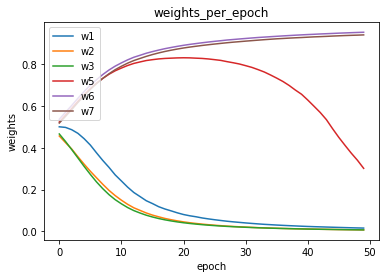

In [ ]:
# plt.plot(W1_F, label='W1')
# plt.plot(W2_F, label='W2')
#...
weights_per_epoch_np = np.array(weights_per_epoch)
plt.plot(weights_per_epoch_np[:,0])
plt.plot(weights_per_epoch_np[:,1])
plt.plot(weights_per_epoch_np[:,2])
plt.plot(weights_per_epoch_np[:,3])
plt.plot(weights_per_epoch_np[:,4])
plt.plot(weights_per_epoch_np[:,5])
plt.title('weights_per_epoch')
plt.ylabel('weights')
plt.xlabel('epoch')
plt.legend(['w1', 'w2', 'w3', 'w5', 'w6', 'w7'], loc='upper left')
plt.show()

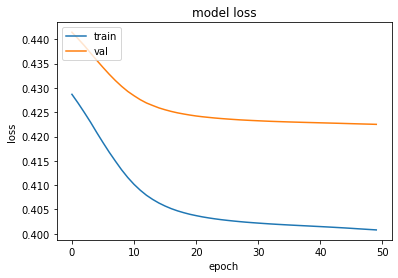

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

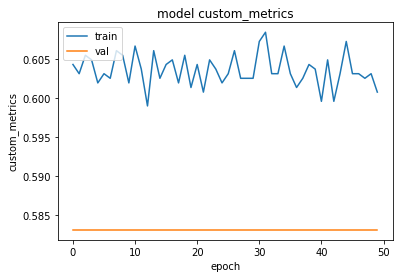

In [ ]:
plt.plot(history.history['custom_metrics3'])
plt.plot(history.history['val_custom_metrics3'])
plt.title('model custom_metrics')
plt.ylabel('custom_metrics')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

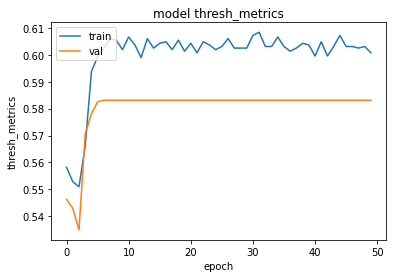

In [ ]:
plt.plot(history.history['thresh_metrics3'])
plt.plot(history.history['val_thresh_metrics3'])
plt.title('model thresh_metrics')
plt.ylabel('thresh_metrics')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model with Vectorized text as inputs

In [ ]:
# businessData: numpy.ndarray object that holds the X, or data. Data is just every sentence that appears in the regular articles? Tokenized sentence?
# OR is it a feature column, as in businessData = ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'] like from the linear regression colab
#In that case, calculate the six different F-scores for each existing sentence, then add that set of 6 F-scores as one element that looks like:
# ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'] into an array called businessData.
# Keep repeating until businessData looks like: array([['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], [........]])
businessData = []

# businessTarget: numpy.ndarray object that holds y, or target.
# Target is 0 or 1 for each sentence (0 = doesnt appear in summary, 1 = appears in summary), and sentences in this array/column should be in same order as in businessData.
businessTarget = []

# Fill businessData: loop through "documents" variable, where every document is an element, and each element (document) holds every sentence in that particular document.
# Then calculate F1, F2, F3, etc. scores for each sentence by passing in the current document # and the current sentence.
# Save the F1, F2, F3, F5, F6, F7 scores as in ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], add that element into businessData variable.
# Keep repeating until businessData looks like: array([['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], ['F1Score', 'F2Score', 'F3Score', 'F5Score', 'F6Score', 'F7Score'], [........]])

docNum = 0 # represents document number, i.e a document number of 510 corresponds to 510.txt
for nextDoc in documents: # loop through documents
  docNum += 1
  title = nextDoc[0]
  for nextSent in nextDoc: # loop through sentences in current document
    #print(docNum, nextSent) # testing line to print every individual sentence, labeled by each sentence's document number, and any other info
    #print("title: ", title) # testing line. Currently (as of 11/26) title contains both the first line, and the line right after it, probably bc the lines are not separated by a '.'
    F1Score = F1(title, nextSent)
    F2Score = F2(nextSent, nextDoc)
    F3Score = F3(nextDoc, nextSent)
    F5Score = F5(nextDoc, nextSent)
    F6Score = F6(nextSent)
    F7Score = F7(nextSent)

    # save F1 scores into array. For F5Score, only take [1] because that's the numerical value returned. [0] is a sentence string.
    myFScores = [F1Score, F2Score, F3Score, F5Score[1], F6Score, F7Score]

    # add array of Fscores into businessData
    businessData.append(myFScores)

    # also determine whether current sentence appears in summary or not (corresponding to value of 1 or 0 respectively)
    myTargetVal = in_summ(nextSent, docNum)
    #print(myTargetVal, docNum, nextSent) #testing: print out current sentence, along with the targetValue that is 0 or 1, and the doc number
    businessTarget.append(myTargetVal) # add the 1 or 0 value into businessTarget

# convert businessData and businessTarget to numpy.ndarray objects
businessData = np.array(businessData)
businessTarget = np.array(businessTarget)

X_train, X_test, y_train, y_test = train_test_split(businessData, businessTarget, test_size=0.2)

In [ ]:
data = pd.DataFrame()

data['sentence'] = sentences
data['f1'] = businessData[:,0]
data['f2'] = businessData[:,1]
data['f3'] = businessData[:,2]
data['f5'] = businessData[:,3]
data['f6'] = businessData[:,4]
data['f7'] = businessData[:,5]
data['target'] = businessTarget
x = data["sentence"]
y = data[['f1','f2','f3','f5','f6','f7','target']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
cvec = CountVectorizer(stop_words=top_words[:20].tolist())
cvec.fit(X_train)
X_train = cvec.transform(X_train)

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())
X_train_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


001  003  01  02  024  025  027  03  04  0400  ...  zealand  zephyr  \
0       0    0   0   0    0    0    0   0   0     0  ...        0       0   
1       0    0   0   0    0    0    0   0   0     0  ...        0       0   
2       0    0   0   0    0    0    0   0   0     0  ...        0       0   
3       0    0   0   0    0    0    0   0   0     0  ...        0       0   
4       0    0   0   0    0    0    0   0   0     0  ...        0       0   
...   ...  ...  ..  ..  ...  ...  ...  ..  ..   ...  ...      ...     ...   
6834    0    0   0   0    0    0    0   0   0     0  ...        0       0   
6835    0    0   0   0    0    0    0   0   0     0  ...        0       0   
6836    0    0   1   0    0    0    0   1   0     0  ...        0       0   
6837    0    0   0   0    0    0    0   0   0     0  ...        0       0   
6838    0    0   0   0    0    0    0   0   0     0  ...        0       0   

      zero  zeros  zheng  zinc  zoellick  zone  zones  zurich  
0        0      0      0     0         0     0      0       0  
1        0      0      0     0         0     0      0       0  
2        0      0      0     0         0     0      0       0  
3        0      0      0     0         0     0      0       0  
4        0      0      0     0         0     0      0       0  
...    ...    ...    ...   ...       ...   ...    ...     ...  
6834     0      0      0     0         0     0      0       0  
6835     0      0      0     0         0     0      0       0  
6836     0      0      0     0         0     0      0       0  
6837     0      0      0     0         0     0      0       0  
6838     0      0      0     0         0     0      0       0  

[6839 rows x 12076 columns]

In [ ]:
X_test = cvec.transform(X_test)

X_test_df = pd.DataFrame(X_test.toarray(),
                          columns=cvec.get_feature_names())
X_test_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


001  003  01  02  024  025  027  03  04  0400  ...  zealand  zephyr  \
0       0    0   0   0    0    0    0   0   0     0  ...        0       0   
1       0    0   0   0    0    0    0   0   0     0  ...        0       0   
2       0    0   0   0    0    0    0   0   0     0  ...        0       0   
3       0    0   0   0    0    0    0   0   0     0  ...        0       0   
4       0    0   0   0    0    0    0   0   0     0  ...        0       0   
...   ...  ...  ..  ..  ...  ...  ...  ..  ..   ...  ...      ...     ...   
1705    0    0   0   0    0    0    0   0   0     0  ...        0       0   
1706    0    0   0   0    0    0    0   0   0     0  ...        0       0   
1707    0    0   0   0    0    0    0   0   0     0  ...        0       0   
1708    0    0   0   0    0    0    0   0   0     0  ...        0       0   
1709    0    0   0   0    0    0    0   0   0     0  ...        0       0   

      zero  zeros  zheng  zinc  zoellick  zone  zones  zurich  
0        0      0      0     0         0     0      0       0  
1        0      0      0     0         0     0      0       0  
2        0      0      0     0         0     0      0       0  
3        0      0      0     0         0     0      0       0  
4        0      0      0     0         0     0      0       0  
...    ...    ...    ...   ...       ...   ...    ...     ...  
1705     0      0      0     0         0     0      0       0  
1706     0      0      0     0         0     0      0       0  
1707     0      0      0     0         0     0      0       0  
1708     0      0      0     0         0     0      0       0  
1709     0      0      0     0         0     0      0       0  

[1710 rows x 12076 columns]

In [ ]:
def custom_loss_wrapper_2(input_tensor):
  def custom_loss(y_true, y_pred):
    f_functions = y_true[:,:-1]
    weighted_avgs = tf.divide(tf.reduce_sum(tf.multiply(y_pred, f_functions), axis=1), tf.reduce_sum(y_pred, axis=1))
    return tf.abs(tf.subtract(weighted_avgs, y_true[:,-1]))
  return custom_loss

In [ ]:
def custom_metrics_wrapper_2(input_tensor):
  def custom_metrics(y_true, y_pred):
    f_functions = y_true[:,:-1]

    weighted_avgs = tf.divide(tf.reduce_sum(tf.multiply(y_pred, f_functions), axis=1), tf.reduce_sum(y_pred, axis=1))
    return tf.reduce_mean(tf.cast(tf.equal(y_true[:,-1], tf.round(weighted_avgs)), tf.float32))
  return custom_metrics

In [ ]:
def thresh_metrics_wrapper_2(input_tensor, threshold):
  def thresh_metrics(y_true, y_pred):
    f_functions = y_true[:,:-1]
    tf.print(len(f_functions))
    weighted_avgs = tf.divide(tf.reduce_sum(tf.multiply(y_pred, f_functions), axis=1), tf.reduce_sum(y_pred, axis=1))
    return tf.reduce_mean(tf.cast(tf.equal(y_true[:,-1], tf.where(weighted_avgs > threshold, 1.0, 0.0)), tf.float32))
  return thresh_metrics

In [ ]:
from keras.layers.regularization.spatial_dropout3d import Dropout
# Create the feedforward model, with number of hidden layers
# will feed tokenized sentences into neural network
model2 = Sequential()
input_size = X_train_df.shape[1]

# note: maybe experiment with different kernel_initializer, other variables etc. to find best result
#layer1 = Dense(6, input_dim=6, kernel_initializer='uniform', activation='relu')
layer1 = Input(shape=(input_size,))
layer2 = Dense(6, kernel_initializer='uniform', activation='sigmoid')
dropout = Dropout(0.3)
layer3 = Dense(6, kernel_initializer='uniform', activation='sigmoid')

model2.add(layer1) # first layer (input layer)
model2.add(layer2) # second layer (hidden layer)
model2.add(dropout)
model2.add(layer3) # third layer (output layer)

# (input_size*2)+1 = 13

model2.compile(loss=custom_loss_wrapper_2(layer1), metrics=[custom_metrics_wrapper_2(layer1), thresh_metrics_wrapper_2(layer1, 0.3)], optimizer='adam') # compile model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # TEST compile model; this line compiles with non-custom functions

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 72462     
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_11 (Dense)            (None, 6)                 42        
                                                                 
Total params: 72,504
Trainable params: 72,504
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights_per_epoch = []

class CustomCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    weights_per_epoch.append(model2.predict(X_test[0:1])[0])
X_train_df = np.array(X_train_df)
y_train = np.array(y_train)
X_test_df = np.array(X_test_df)
y_test = np.array(y_test)
history = model2.fit(X_train_df, y_train, validation_data=(X_test_df, y_test), epochs=200, batch_size=200, callbacks=[CustomCallback()])

Streaming output truncated to the last 5000 lines.
28/35 [=======================>......] - ETA: 0s - loss: 0.2340 - custom_metrics: 0.8071 - thresh_metrics: 0.9034200
200
30/35 [========================>.....] - ETA: 0s - loss: 0.2336 - custom_metrics: 0.8070 - thresh_metrics: 0.9040200
200
32/35 [==========================>...] - ETA: 0s - loss: 0.2336 - custom_metrics: 0.8070 - thresh_metrics: 0.9042200
200
34/35 [============================>.] - ETA: 0s - loss: 0.2340 - custom_metrics: 0.8069 - thresh_metrics: 0.903239
200
200
200
200
200
200
200
200
110
35/35 [==============================] - 2s 48ms/step - loss: 0.2339 - custom_metrics: 0.8051 - thresh_metrics: 0.9045 - val_loss: 0.3770 - val_custom_metrics: 0.6285 - val_thresh_metrics: 0.6548
Epoch 95/200
200
 1/35 [..............................] - ETA: 1s - loss: 0.2454 - custom_metrics: 0.7750 - thresh_metrics: 0.8600200
200
 3/35 [=>............................] - ETA: 1s - loss: 0.2337 - custom_metrics: 0.8067 - thresh_me

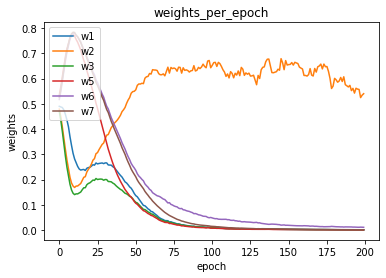

In [ ]:
# plt.plot(W1_F, label='W1')
# plt.plot(W2_F, label='W2')
#...
weights_per_epoch_np = np.array(weights_per_epoch)
plt.plot(weights_per_epoch_np[:,0])
plt.plot(weights_per_epoch_np[:,1])
plt.plot(weights_per_epoch_np[:,2])
plt.plot(weights_per_epoch_np[:,3])
plt.plot(weights_per_epoch_np[:,4])
plt.plot(weights_per_epoch_np[:,5])
plt.title('weights_per_epoch')
plt.ylabel('weights')
plt.xlabel('epoch')
plt.legend(['w1', 'w2', 'w3', 'w5', 'w6', 'w7'], loc='upper left')
plt.show()

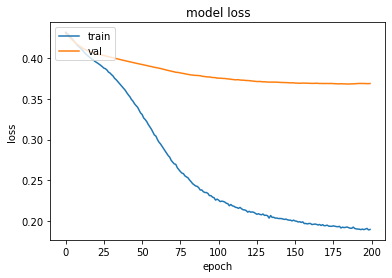

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

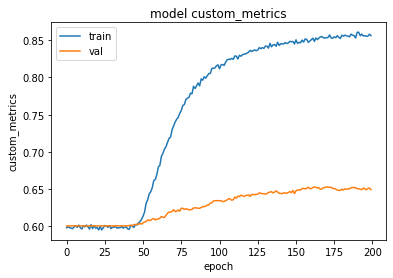

In [ ]:
plt.plot(history.history['custom_metrics'])
plt.plot(history.history['val_custom_metrics'])
plt.title('model custom_metrics')
plt.ylabel('custom_metrics')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

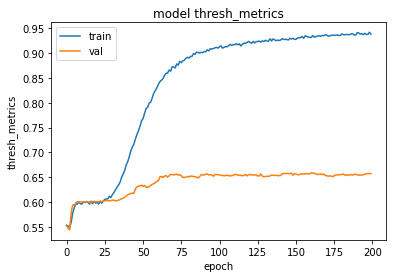

In [ ]:
plt.plot(history.history['thresh_metrics'])
plt.plot(history.history['val_thresh_metrics'])
plt.title('model thresh_metrics')
plt.ylabel('thresh_metrics')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<a name='textrank'></a> 
### Cells below show the pre-trained model TextRank to extract the most important sentence from each article, to further compare and illustrate the difference in performance between TextRank and the above built NN model with F scores.



In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.6 MB/s 
     |████████████████████████████████| 5.8 MB 24.8 MB/s 
     |████████████████████████████████| 1.3 MB 50.8 MB/s 
     |████████████████████████████████| 182 kB 68.1 MB/s 
     |████████████████████████████████| 7.6 MB 48.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e6cd8ea124e5b815786239c9aa7e03849c14c8fd85470b4103d56975f34ac8da
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
pip install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tokenizers import Tokenizer
import transformers
from transformers import  AutoTokenizer
from sentence_transformers import SentenceTransformer, models, util
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from scipy import spatial
import networkx as nx
import scipy

In [ ]:
y_pred_textrank=[]

In [ ]:
count=0

for article in documents:
  count+=1
  #for sentence in article:
  sentences_clean=[re.sub(r'[^\w\s]','',sentence.lower()) for sentence in article]
  sentence_tokens=[[words for words in sentence.split(' ') ] for sentence in sentences_clean]
  w2v=Word2Vec(sentence_tokens,size=1,min_count=1,iter=1000)
  sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
  max_len=max([len(tokens) for tokens in sentence_tokens])
  sentence_embeddings=[np.pad(embedding,(0,max_len-len(embedding)),'constant') for embedding in sentence_embeddings]

  similarity_matrix = np.zeros([len(sentence_tokens), len(sentence_tokens)])
  for i,row_embedding in enumerate(sentence_embeddings):
    for j,column_embedding in enumerate(sentence_embeddings):
      similarity_matrix[i][j]=1-spatial.distance.cosine(row_embedding,column_embedding)

  nx_graph = nx.from_numpy_array(similarity_matrix)
  scores = nx.pagerank(nx_graph)

  top_sentence={sentence:scores[index] for index,sentence in enumerate(article)}
  top=dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:1])
  textrankSentence=""
  for sent in article:
    if sent in top.keys():
      textrankSentence=sent
      print(sent)

  for sentence in article:
    myTargetVal = in_summ(textrankSentence, count)
    y_pred_textrank.append(myTargetVal)
    
  print("document no:",count)

<ipython-input-120-a0b63ebcd60e>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]


It has already offered to pay 300m to settle charges in a deal that is under review by the SEC
document no: 1


Hes taking a longerterm view laying out a set of conditions under which the current account deficit can improve this  and next
document no: 2


Yukos had filed for ruptcy protection in a US court in an attempt to prevent the forced sale of its main production arm
document no: 3


Our focus remains on reducing controllable costs and debt whilst continuing to invest in our products  Eddington 
document no: 4


Reports in the Wall Street Journal and the Financial Times suggested that the French spirits  is considering a bid but has yet to contact its target
document no: 5


Revised figures indicated  of just 01  and a similarsized contraction in the previous quarter
document no: 6


The Labor Department also  it had revised down the jobs gains in December  from 157000 to 133000
document no: 7


India along with China Brazil South Africa and Russia has been invited to take part in the G7 meeting taking place in London on Friday and Saturday
document no: 8


Good rains increased use of fertilizers and improved seeds contributed to the rise in production
document no: 9


They also say they have already met many of the s demands in a landmark 206bn settlement reached with 46 states in 1998
document no: 10


During the same quarter Yahoo earned 187m again tipping a resurgence in online advertising
document no: 11


The BBCs correspondent in Jakarta Rachel Harvey told World Business Report that there was likely to be a strong public reaction to any price rise
document no: 12


The two s signed a Memorandum of Understanding and say they expect to seal a final agreement by Spring 2005
document no: 13


They are hoping that by boosting colour it will make their publications more attractive to advertisers and readers alike
document no: 14


The EC has launched an information campaign in airports and travel agencies to inform airline passengers of their  rights
document no: 15


China has thus far resisted international pressure to break the link or at least to shift the level of its peg
document no: 16


Its pretax earnings in the fourth quarter were 77m euros £53m 100m up from 38m in the same period of 2003
document no: 17


Indias rupee has hit a five high after Standard  Poors SP raised the countrys foreign currency rating
document no: 18


We need at least 20bn £106bn in investment and part of this has to come as foreign direct investment   Maran
document no: 19


Only 42 of them say that saving money is the main consideration when closing domestic call centre operations
document no: 20


The move left the group with three core divisions gaming Hard Rock and Deluxe Films which provides technical services to Hollywood studios
document no: 21


There are clear signs of a revival in domestic demand  FrankJuergen Weise head of the Federal Labour Agency in a statement
document no: 22


Also on Friday Frances industrial output for December was released showing 07 
document no: 23


Foreign  exports surged by 357 to a record 1807bn reflecting the rally in global   and increasing domestic demand
document no: 24


The vast majority of the business and financial activities of Yukos continue to occur in Russia Judge Clark  in her ruling
document no: 25


GM is also recalling 19924 Cadillac XLR coupes SRX SUVs and Pontiac Grand Prix sedans from the  model 
document no: 26


We are investing in modernisation so employees will go down  Mittal told the conference in Chicago
document no: 27


Crude   surged back above the 47 a barrel mark on Thursday after an energy  watchdog raised its forecasts for global demand
document no: 28


The  whose Agroflora subsidiary operates 13 farms in Venezuela insisted that it had complied fully with Venezuelan law
document no: 29


Chinas booming  and a spectacular comeback in Japan  albeit one that has faltered in recent months  would help world  recovery the OECD 
document no: 30


Bernard McAlinden head of equity research at NCB Stockbrokers  equities represented good value compared to other investments
document no: 31


However UFJs management was known to prefer the offer from Mitsubishi Tokyo Financial Group MTFG Japans secondlargest 
document no: 32


A total of 242 trillion pesos 102bn £55bn is earmarked for subsidies for the poor the  department for planning 
document no: 33


Shanghai Automotive Industry Corp plans to shift production of the Rover 25 to China and export it to the UK sources close to the negotiations tell the FT
document no: 34


UK advertising giant WPP has posted largerthanexpected annual profits and predicted that it will outperform the  in 2005
document no: 35


Over the past few months delegations of European and other business leaders have been heading to the SECs Washington DC headquarters to protest
document no: 36


I felt enormous pressure when I dined with him and it was nothing but pain Tsutsumi told a weekly magazine in 1987
document no: 37


TMobile USA the s American mobile business made a strong contribution to profits
document no: 38


This compares with 59 litres in France 12 litres in the US and three litres in Japan
document no: 39


It hopes 2005  will benefit from the launch of a  England replica shirt ahead of the 2006 World Cup
document no: 40


Recent increases in defence and homeland security spending were also not expected to continue indefinitely which should cut some costs
document no: 41


The South Yorkshire  led by   executive Gerry Spindler  it hoped to return to profit in 2006
document no: 42


Women now make up more than half of all graduates from Saudi universities but only 5 of the workforce
document no: 43


Figures released by the s Cabinet Office showed that GDP on an annualised basis fell 05 in the last three months of 
document no: 44


A spokesman for the group was unable to say when the production unit would be back up and running
document no: 45


The  has grown for six quarters but  slowed dramatically in the last quarter amid weaker global demand
document no: 46


Ryanair chairman David Bonderman  that the 737800 had significantly reduced our unit operating costs and allowed us to reduce air fares each  for the last five s
document no: 47


In a statement issued on Wednesday night Parmalat Finanziaria detailed administrators latest plans for relisting the  of the group
document no: 48


Less than four s after the  Mini was launched German car maker BMW has announced £100m of  investment
document no: 49


Nestles total earnings before interest remained broadly flat over the past  despite the  managing to boost profit margins
document no: 50


Analysts  the reported restructuring was evidence of the greater flexibility which Fiat now had to develop the business
document no: 51


Analysts say that hiring and firing staff is still too difficult and expensive hampering the development of small and mediumsized businesses
document no: 52


Reuters beat profit forecasts posting a 52 rise in profits for the  to £198m from the £130m seen a  earlier
document no: 53


The  didnt give details of its investment but it  the  plant would produce 150000 cars a 
document no: 54


Aiming to both stir   and aid the countrys poor finance minister Trevor Manuel  the focus of the 2005 budget was more for all
document no: 55


China remains the main area of concern for BMW after  there fell 16 last 
document no: 56


The MPC judges that overall  was a little higher in the third quarter than the official data currently indicate Ms Lomax 
document no: 57


It did not say which facilities would be affected but intends moving them to Asia eastern Europe and Mexico
document no: 58


Cynthia Cooper WorldComs exhead of internal accounting alerted directors to irregular accounting practices at the US telecoms giant in 2002
document no: 59


Two executives from American International Group AIG and one from Marsh  McLennan were the latest
document no: 60


Marc Ostwald a strategist at Monument Securities told Reuters that while no immediate  impact could be expected it is enough to underline that they the BoE will be more hawkish on rates
document no: 61


The decline came despite Multiplex reporting an 11 rise in pretax profits to A677m for  and reafing its 2005 profit forecasts
document no: 62


Van Rourke a bond strategist at Popular Securities agreed that the latest retail  figures were slightly stronger than expected
document no: 63


We are doing research into the possibilities we have Michael Lamberty a Lufthansa spokesman told the BBC
document no: 64


Of course we applaud humanitarian initiatives but why target the airlines  Ulrich SchulteStrathaus secretary general of the Association of European Airlines
document no: 65


 and Labour Minister Wolfgang Clement called the dip in Februarys Ifo confidence figure a very mild decline
document no: 66


Billions of farmers livelihoods are at risk from falling commodity  and protectionism the UNs Food  Agriculture Organisation has warned
document no: 67


The Indian s decision has spread good cheer in the construction sector according to some Indian s
document no: 68


Net profit was 186m £98m 143m euros in the quarter compared with 113bn in the same period in 2003
document no: 69


 in the retailer were up 196 at 1704 in Tuesday morning trading in  York following the announcement
document no: 70


Japanese brewers are increasingly making money from beerflavoured drinks rather than beer itself
document no: 71


South Korea looks set to sustain its revival thanks to reed private consumption its central  says
document no: 72


Major companies including Volkswagen DaimlerChrysler and Siemens have spent much of  in tough talks with unions about trimming jobs and costs
document no: 73


The  has  it is prepared to accept a minority stake if Iran will award it the mobile deal
document no: 74


Global leaders have focused attention on poverty reduction and development at recent meetings of the G7 Group and World  Forum
document no: 75


Nearly half of all Palestinians  some 47  live below the poverty line and are particularly vulnerable to  shocks
document no: 76


They understand property rights in Russia are not the most important rights and they are more interested in guaranteeing supplies
document no: 77


The last thing they need is additional production capacity in Europe  Patrick Juchemich auto analyst at Sal Oppenheim 
document no: 78


The Federal Trade Commission  two in five of the 635173 reports it had from consumers concerned ID fraud
document no: 79


The two countries also formalised a cooperation deal between Venezuelan energy  PDVSA and Argentinas Enarsa
document no: 80


The German  is to extend a planned production break at one of its plants due to the faulty Bosch part
document no: 81


Yet other names mentioned in connection to buying Exel are DHLowner Deutsche Post and finance  GE Capital
document no: 82


Yukos  financial officer Bruce Misamore who had moved to the US in early December to set up Yukos USA acknowledged the point
document no: 83


About 10 million Mexicans live in the US where there are 16 million citizens of Mexican origin
document no: 84


Changes to mortgage regulation may have artificially depressed figures in November thus flattering the December figures analysts 
document no: 85


But despite missing forecasts of 537 the PMI number remained above 50  indicating expansion in the sector
document no: 86


During cross examination he asked  Myers if he ever k  Ebbers make an accounting decision
document no: 87


US ing giant Citigroup has sold its Travelers Life  Annuity insurance arm to Metlife for 115bn £61bn
document no: 88


The comments come a day after US Treasury Secretary John Snow  a strong dollar was in Americas interest
document no: 89


The  will also seek European Union approval to distil about 250 million litres of excess wine into alcohol with vintners receiving compensation
document no: 90


SP had held back through fear that the  was dragging its feet on  and legal reforms
document no: 91


Parliament as a whole  dominated by religious conservatives  will vote on the ruling on Tuesday
document no: 92


The country has been in default on the 1026bn  based on an original debt of 818bn plus interest  for the past three s
document no: 93


The US  has grown more than expected expanding at an annual rate of 38 in the last quarter of 
document no: 94


But competition has intensified and the  and the  is short on  product launches
document no: 95


The  which floated in 2003 recently announced a deal to buy 26 of Indian  Hindustan  Exploration
document no: 96


Domestic consumer demand is cooling and heavy spending by President Bush has pushed the budget deficit to a record 427bn £230bn
document no: 97


The International Monetary Fund is to cut its 2005  forecast for the German  from 18 to 08 the Financial Times Deutschland reported
document no: 98


As gas  continue their upward march fuel efficiency catches the public eye Jim Press vice president and  operating officer of Toyotas US  arm  in a statement
document no: 99


 Ebbers could face a jail sentence of up to 85 s if convicted of all the charges he is facing
document no: 100


However shortly after the  made its decision  figures showed a fall in   in the last quarter
document no: 101


The Titan corporation was accused of funnelling more than 2m into the 2001 reelection campaign of President Mathieu Kerekou
document no: 102


Marsh posted a 676m £352m loss for the last three months of  against a 375m £1953m profit a  before
document no: 103


 lawyers  they would ask the full US Court of Appeals for the District of Columbia to hear the case
document no: 104


Aston  whose cars were famously used by James Bond  will unveil the Vantage at the Geneva Motor Show on Thursday
document no: 105


I dont believe it would be a big election issue in Britain or a problem for Labour  Balls 
document no: 106


The IMF  that according to data provided by the Liberians the countrys GDP rose by 2 in  after a 31 decline in 2003
document no: 107


Analysts had expected Februarys figure to be stronger than Januarys and come in at 57
document no: 108


The board of Lufthansa has recommended paying a  dividend of 030 euros per share
document no: 109


The  had stagnated throughout the 1990s experiencing only brief spurts of expansion amid long periods in the doldrums
document no: 110


Unilever took a 15bn euro onetime charge in the fourth quarter including a 650m euro writedown on Slimfast diet foods
document no: 111


An illfated expansion drive in the late 1990s saw France Telecoms debt soar to 72bn euros by 2002
document no: 112


Vodafone and O2 Britains other big mobile phone operator were sent similar statements of objections by the Commission in July last 
document no: 113


 Ebbers 63 has always insisted that he was unaware of any hidden shortfalls in WorldComs finances
document no: 114


The continuing success of our key products means we can now look forward to a good performance in 2005 he 
document no: 115


 of Sumitomo Mitsui Financial SMFG and Daiwa Securities jumped amid speculation that two of Japans biggest financial companies will merge
document no: 116


Overall DaimlerChrysler saw worldwide vehicle  rise 8 to 47 million in  while total revenues added 4 to 142bn euros
document no: 117


However the  remained optimistic about its earnings outlook after  in the fourth quarter rose 9 to 394bn kronor
document no: 118


Interest rates rose five times between November 2003 and August  as soaring house  and buoyant consumer data sparked inflation fears
document no: 119


The country could be looking to emulate rival Ghana which produced a bumper crop last 
document no: 120


However BoE governor Mervyn King warned only last month that the era of consistently low inflation and low unemployment may be coming to an end
document no: 121


These businesses became part of BOA when it snapped up rival  FleetBoston in a 47bn merger last March
document no: 122


Tube workers walked out last week demanding a 53 pay rise and in protest against the installation of automatic ticket machines
document no: 123


But without the Otoku ing spend it would have made a profit  and expects to move into the black in 2006
document no: 124


The bid was thrown out by Treasurer Peter Costello on national interest grounds
document no: 125


The outlook for 2005 is good as a result of balance sheet  and investments made in   Varley 
document no: 126


 Khodorkovsky currently facing fraud and tax evasion charges of his own was one of the founders of Menatep
document no: 127


Qantas  fell almost 3 however after it warned that earnings  would slow in the second half
document no: 128


Bids have been invited from local Arab and foreign companies Iraqs Ministry of Communications 
document no: 129


Lockheed  it had signed an agreement with stateowned Hindustan Aeronautics HAL to share information on the P3 Orion maritime surveillance aircraft
document no: 130


But he  the latest development was simply an interim step to allow foreigners to trade in Gazprom
document no: 131


Belgian brewing giant Inbev has seen its profits soar thanks to its acquisition of Brazils biggest beer  Ambev last 
document no: 132


In a report compiled by anticorruption body Transparency International in 2003 graft was  to be pervasive in Cameroon
document no: 133


There is also speculation that President Bush will deliberately try to keep the dollar low in order to assist a  in exports
document no: 134


But critics of the judgement say feta is a generic term with the cheese produced widely outside Greece
document no: 135


Ms Tymoshenko  prosecutors had drawn up a list of more than 3000 businesses which were to be reviewed
document no: 136


UK interest rates are set to remain on hold at 475 following the latest meeting of the  of England
document no: 137


Much of western Europe and the north east of America has been shivering under unseasonably low temperatures in recent days
document no: 138


Using the most internationallyaccepted methodology of the International Labour Organisation ILO Germany had 397 million people out of work in January
document no: 139


Vale Do Rio Dolce CVRD this week managed to boost by 72 the price of their iron ore a key component of steel
document no: 140


Customers are moving out of the minivan and traditional concepts are not as attractive anymore he 
document no: 141


It also edged higher against both the euro and the pound with one euro worth 13218 and one pound buying 19094
document no: 142


The owner of brands such as Dairy Milk Dr Pepper and Snapple generates more than 80 of its  outside the UK
document no: 143


Following the comments by acting Opec secretary general Adnan ShihabEldin US light crude fell 32 cents to 5143 a barrel
document no: 144


Analysts say WinnDixie had not kept up with consumers demands and had also been burdened by a number of stores in need of upgrading
document no: 145


While there has been  in overall employment rates in Europe productivity lags behind that of the US
document no: 146


Islamic s offer services which permit modern ing principles while sticking to Islamic laws ban on the payment of interest
document no: 147


Fiat has yet to comment on the matter but the unions say the  engines will be made by GM in Australia
document no: 148


Doing so would remove the exposure to the weak US dollar which is making Saabs more expensive to US consumers
document no: 149


The outcome of these evaluations will be used to determine possible reinitiation of dosing in clinical trials and future commercial availability
document no: 150


The s latest inflation report released last week had noted that the main reason inflation might fall was weaker consumer spending
document no: 151


Freezing temperatures and heavy snowfall have increased demand for heating fuel in the US where stocks are low
document no: 152


The  revealed that 48000 fewer mortgages were approved in January than for the same month in 
document no: 153


The extra leeway came after the Office for National Statistics  it had been measuring road expenditure data wrongly over the past five s
document no: 154


May has struggled to compete against larger department store groups such as Federated and other retailers such as WalMart
document no: 155


Only an exceptionally strong performance in the early months of  kept the  as a whole from showing a decline
document no: 156


A close associate of former Yukos boss Mikhail Khodorkovsky has told a court that fraud charges levelled against him are false
document no: 157


Frances Total is expected to join the ExxonMobil scheme dubbed Qatargas2 on Monday taking 5 million tonnes of LNG a 
document no: 158


The following  though would have to be back on track he warned
document no: 159


The relationship soured further after Fiat sold half its finance arm and recapitalised in 2003 halving GMs stake to 10
document no: 160


The Pentagon has investigated 400 contracts dating back to 1993 since the allegations against Ms Druyun came to light
document no: 161


Last week SBC Communications agreed to buy its former parent and phone trailblazer ATT for about 16bn
document no: 162


The universitys index of consumer spending fell to 942 in early February from 955 in January which could indicate a fall in retail spending by the US public
document no: 163


The four companies named in the law suit are gas giant Gazprom its unit Gazpromneft investment  Baikal and state   Rosneft
document no: 164


The  expanded at an annual rate of 37 in the July to September period the Commerce Department 
document no: 165


The £10bn Crossrail transport plan backed by business groups is to get the goahead this month according to The Mail on Sunday
document no: 166


Solidere should be above 10 but because of this disaster it is falling  one trader
document no: 167


The CBI also found spending on innovation training and retraining is forecast to go up over the next 
document no: 168


Interest in Jets IPO has been fuelled by hopes for robust  in Indias air travel 
document no: 169


The average UK house price fell from £180126 in November to £178906 reflecting recent Land Registry figures coning a slowdown in late 
document no: 170


Analysts  that the move is aimed at winning over investors opposed to its bid for the London Stock Exchange
document no: 171


On Monday Germanys BdB private s association  the German  would struggle to meet its 14  target in 2005
document no: 172


Carlsberg is more optimistic than Heineken about 2005 projecting a 15 rise in net profits for the 
document no: 173


Net income jumped to 3bn yuan in  365m £190m compared with 14bn yuan in 2003
document no: 174


According to the INSEE car  fell 28 in January following a fall of 06 in December
document no: 175


But the wide difference in price also means that there are big gains to be made from illegally diverting these cheaper drugs back into wealthier countries and reselling them at a higher price
document no: 176


Visitor levels and interest in this period have been encouraging and reservations have been at the stronger end of our expectations
document no: 177


A decision could be reached in December when the WTOs 148 current members gather for a summit in Hong Kong
document no: 178


The Sunday Times and The Sunday Telegraph say they will oppose any formal £800m takeover bid from US tycoon Malcom Glazer
document no: 179


On Tuesday traders in Asia  that both South Korea and Taiwan had withdrawn their bids to buy dollars at the start of the session
document no: 180


The former Yukos subsidiary was controversially sold off last  and eventually acquired by stateowned energy giant Rosneft
document no: 181


Obligatory employer contributions to worker welfare programmes mean that it costs more to hire staff in France than in many other European economies
document no: 182


He much preferred the old currencies of Europe which moved in relation to each countrys  performance
document no: 183


Dresdner Kleinwort Wasserstein  In spite of the snow in the UK it still feels very early to be cutting  of spring merchandise
document no: 184


Details of his Vermont colleague Pat Leahys credit card account are among those missing Senator Leahys spokeswoman Tracy Schmaler 
document no: 185


Budget carriers Kingfisher Airlines and SpiceJet are planning to launch operations in May this 
document no: 186


The generals opponents rejoiced at the settlement which was agreed in a court in the Spanish capital Madrid
document no: 187


MCI accepted a 675bn £36bn buyout from telecoms giant Verizon on Monday rejecting a higher offer from Qwest
document no: 188


The car business best known for its Alfa Romeo marque is expected to make a loss of about 800m euros in 
document no: 189


Here it gets contributions from investment and exports though household consumption is still strong
document no: 190


The European Medicines Agency also  doctors should be cautious about giving the drugs to patients who have risk factors for heart disease
document no: 191


Russian authorities do not have to abide by any US court decisions taken with regard to troubled  giant Yukos a Houston court has been told
document no: 192


 executive Gerd Niebaum stepped down last week and creditors are now pushing for greater control
document no: 193


These figures show beyond doubt the recent slowdown in the housing  Peter Williams CML deputy director 
document no: 194


Other than its warning on possible tax hikes the NIESR report was optimistic about the state of the UK and global 
document no: 195


 Ebbers could face a sentence of 85 s if convicted of all the charges he is facing
document no: 196


The controversial selloff of a Ukrainian steel mill to a relative of the former president was illegal a court has ruled
document no: 197


This area does need more appraisal drilling but it looks very strong Dr Mike Watts head of exploration 
document no: 198


Documentation about where this money came from doesnt exist because under the former entirely warped regime earning capital honestly was not possible
document no: 199


Fidel Castros decision to ban all cash transactions in US dollars in Cuba has once more turned the spotlight on Cubas ailing 
document no: 200


Based on  figures the ly merged producer would have  of more than 5bn the  estimated
document no: 201


MCI  jumped on Friday hitting their highest level since April  amid speculation that it would be the focus of a bidding war
document no: 202


We are not scared to take this to its conclusion this time Atticus David Slager told the Sunday Times
document no: 203


At the heart of the administrations fifth budget presented to Congress on Monday is an austere package of domestic measures
document no: 204


Easymobile will allow customers to go online to order SIM cards and airtime  which will be rented from TMobile  for their existing handsets
document no: 205


Our payouts continue to stand up well against other types of longterm investments over similar periods he 
document no: 206


Paul Richards an analyst at Numis Securities  the  would be focusing on the slump in music  rather than the timing of the two albums
document no: 207


Chinese online game operator Shanda Interactive Entertainment has bought a 20 stake in Sina the countrys biggest internet portal 
document no: 208


 Glazer who owns the Tampa Bay Buccaneers team hopes this will lead to a formal bid being accepted
document no: 209


IMF boss Rodrigo Rato was asked by G7 ministers to carry out a study into the feasibility of revaluing and selling gold reserves
document no: 210


Consumer electronics giants Hitachi and Matshushita Electric are joining forces to share and develop technology for flat screen televisions
document no: 211


The Observer reported on Sunday that nearly half the workforce at Longbridge could be under threat if the deal goes ahead
document no: 212


Dr Greenspan  Smiths revolutionary philosophy on human selfinterest laissezfaire s and competition had been a force for good in the world
document no: 213


Its inflation index which has risen continuously over the last 8 months climbed to 1100 in January from 1080 in October last 
document no: 214


The Act also applies to s with more than 300 US shareholders a situation many s without US listings could find themselves in
document no: 215


These actions helped Nissan turn a 684bn yen 64bn loss in 2000 into a 331bn yen 27bn profit the following 
document no: 216


Earlier this month  Prime Minister Yulia Tymoshenko  as many as 3000 s may have their privatisations put under the spotlight
document no: 217


Absa also announced that it expects to see earnings grow by 2025 in its current financial 
document no: 218


Borussia officials met with almost all the s involved in its financing on Friday and over the weekend
document no: 219


Since then an improved offer from Deutsche Boerse has been anticipated as its management has continued talks with LSE  executive Clara Furse
document no: 220


Lord Browne pointed out that BP was reaping the benefits of its investment in  exploration
document no: 221


No further details were given with  Trutnev suggesting that Russia may decide on a casebycase basis
document no: 222


Wembley announced the planned sale as it revealed it was to offload its US gaming division to BLB Investors
document no: 223


Earlier this month  Glazer presented the board with detailed proposals on an offer to buy the football club
document no: 224


Higher interest rates and uncertainty over the housing  continue to take their toll on the retail sector the BRC 
document no: 225


McDonalds the worlds largest restaurant chain is to sponsor a programme on music channel MTV as part of its latest youth  promotion
document no: 226


TUC General Secretary Brendan Barber called for a commitment to policies that will make a real difference to the lives of working people
document no: 227


The combination means a revenue shortfall during 2005 SLBA chairman  and Commercial  managing director  AL Gooneratne told a s conference
document no: 228


 Glazer who owns the Tampa Bay Buccaneers team hopes this will lead to a formal bid being accepted
document no: 229


A hearing scheduled for February 16 and 17 will rule on whether the US court has jurisdiction in the case
document no: 230


We are defending our national sovereignty over the use of our national resources which must serve the endogenous development of the nation  Alvarez 
document no: 231


Brokers must give information on their commissions if and only if their customers request it the FSA 
document no: 232


The  Paion  that it hoped to sell 5 million   a third of the   for 1114 euros a share
document no: 233


I do not know if it will be worth it for them to spend that kind of money just for Japan
document no: 234


Chris Curry PPI research director  its calculations suggested there could be more pressure on state pension spending than originally envisaged
document no: 235


Nearly two thirds  65  of the 1000 people interviewed  they had used chip and pin to make payments
document no: 236


Britannia has also stopped making payments to members if they are worth less than £5
document no: 237


Companies facing the biggest deficits had raised their pension contributions by 100 or more IDS 
document no: 238


The core retail price index rose by just 28 in the same period underlining how effective an investment in housing has been for most people during the past decade
document no: 239


Its inflation index which has risen continuously over the last 8 months climbed to 1100 in January from 1080 in October last 
document no: 240


Oxfam senior policy adviser Max Lawson welcomed the statement and  G7 ministers had passed the first hurdle of 2005
document no: 241


Malcolm Glazer was littleknown in the UK until he started to build up his stake in Manchester United in late 2003
document no: 242


Ideally it would be good to have a mains water supply and some means of drainage for tet and washing facilities
document no: 243


Assuming that Citigroup is right and demand stays solid the structure of the industry also works in Carnivals favour
document no: 244


US politicians and citizens of all political persuasions are in for a dose of shock therapy
document no: 245


 Ebbers could face a sentence of 85 s if convicted of all the charges he is facing
document no: 246


Japanese carmaker Nissan  in which Renault owns a 44 stake  contributed 17bn euros in net income over the 
document no: 247


The cost of buying a home fell in seven out of 10 regions between the third and fourth quarters of 
document no: 248


The deficit partly the result of massive tax cuts early in  Bushs presidency has been a key factor in pushing the US dollar lower
document no: 249


Its  are down 20 since the announcement two months ago largely because of the unprofitability of the unit it is buying
document no: 250


Last week SBC Communications agreed to buy its former parent and phone trailblazer ATT for about 16bn
document no: 251


Internet service provider ISP Plusnet also backed the proposals saying we will be entirely happy if Ofcom accepts them
document no: 252


The Labor Department also  it had revised down the jobs gains in December  from 157000 to 133000
document no: 253


The success of products such as Sonys Playstation Microsofts XBox and Nintendos Game Cube have boosted demand for video games
document no: 254


The think tanks proposals were made in response to the recent publication of the Pensions Commissions initial report into UK retirement savings
document no: 255


In the fourth quarter the city states gross domestic product GDP rose at an annual rate of 24
document no: 256


These valuations were the product of decades of inflation which as recently as 2001 was as high as 70
document no: 257


It has earmarked 100 trillion won 96bn for the first six months of 2005 60 of its total annual budget
document no: 258


Strong recovery in some countries such as Venezuela and Uruguay boosted the overall performance of the region
document no: 259


Shaheed noted that investment in a single tourist resort  the  mainstay  could run to 40m
document no: 260


It is not that the broking community is indifferent to disasters or feelings one Bombay trader  this week
document no: 261


Currencies including the Thai baht and Indonesian rupiah weakened as analysts warned that   may slow
document no: 262


Investors who lost money following the splitcapital investment trust scandal are to receive £194m compensation the UKs financial watchdog has announced
document no: 263


Euronext so far has given little away as to what sweeteners it will offer the LSE  Europes biggest equity   into a deal
document no: 264


Doubts also exist over how much the  may have to pay regulators and lawyers to put the scandal behind
document no: 265


After Vladimir Putin became president in 2000 he did not raise taxes but put a lot of effort  too much critics argue  into enforcement
document no: 266


Nasdaq will not make money from the sale only investors who bought  in the private placings the filing documents 
document no: 267


As long as the total amount of interest falls within the allowance then no tax will be payable
document no: 268


We are delighted that Air China has chosen London for its listing outside China  LSE  executive Clara Furse
document no: 269


Mother Nature is going to be huge in the next several weeks  Kyle Cooper at Citigroup Global s
document no: 270


Speaking at the Soccerex football business forum in Dubai he  a full listing was one of the options for funding after the club moves to its  stadium
document no: 271


Investors have praised his handling of the  as foreign investment has risen unemployment has fallen and inflation has been brought under control
document no: 272


And last week US Treasury Secretary John Snow told an audience in the UK that the policy remained unaltered
document no: 273


In one of the most closelywatched initial public offerings in stock  history the USbased  sold 196 million  at 85 each
document no: 274


Changes to the way the statistics are compiled partly explain the jump of 572900 in the numbers
document no: 275


The 865 million share offer a mix of   and  by the  raised 54bn rupees12bn
document no: 276


A key factor for EU decision makers should be whether or not Turkey has met its  criteria
document no: 277


The deal will be financed with 15bn of  as well as a 1bn special dividend paid to ATT shareholders
document no: 278


Deutsche Boerse bosses have held constructive professional and friendly talks with the London Stock Exchange LSE its  has 
document no: 279


The US credit card to travel services giant  offloading American Express Financial Advisors AEFA would boost its profitability
document no: 280


Withprofits policies are designed to smooth out the peaks and troughs of stock  volatility
document no: 281


The Three Gorges Corporation has all along abided by the law and have built our projects in accordance with the law it 
document no: 282


Japanese  have ended the  at their highest level since 13 July amidst hopes of an  recovery during 2005
document no: 283


A vicious cycle of unemployment poor social services and poverty has been made worse by a lack of investment
document no: 284


In 2000 EU leaders at a summit in Lisbon pledged the European  would outstrip that of the US by 2010
document no: 285


China raised rates by 027 percentage points to 58  its first hike in nine s  in October 
document no: 286


Falling demand and a lower tax take could result in soaring budget pressures and a basket case currency
document no: 287


We are benefiting from our  initiatives and an excellent global   GEs  executive Jeff Immelt
document no: 288


But rates have been kept on hold since then amid signs of falling consumer confidence and a slowdown in output
document no: 289


Dismal reports from the retail trade about Christmas  are worrying if they indicate a more general weakening in consumer spending
document no: 290


Antismoking groups urge the  to fight on but the Justice Department has not  if it will appeal
document no: 291


Meanwhile economists cautioned against reading too much into data from the Federal Reserve showing an unexpected 87bn drop in consumer debt in November
document no: 292


We do not want him or anybody else taking over United  Mark Longden of the Independent Manchester United Supporters Association
document no: 293


President Bush has placed reform of the pensions system at the heart of his  agenda for a second term
document no: 294


Nonetheless Japanese s have been stepping up capital investment and the survey found the pace is quickening
document no: 295


Some countries will do better than others but there is no one who is suggesting that no developing country will do well out of this
document no: 296


ABN Ao is the third large European  to announce cutbacks in the past month following Deutsche  and Credit Suisse Group
document no: 297


The other main US mortgage  Freddie Mac restated earnings by 5bn £26bn last  after a probe of its books
document no: 298


He added that the opening bid for the s Yuganskneftgas unit was 8bn  less than half of the 20bn that Yukos advisers say it is worth
document no: 299


Guidant is a key producer of equipment that combats heart problems such as implant defibrillators and pacemakers
document no: 300


However the withdrawal did not mean that Libya had cut its ties with the US he added
document no: 301


Studies have reportedly shown the plant curbs appetite instead of reducing calorific intake like many existing products
document no: 302


Business has improved recently with demand for air travel increasing and a recovery in the Brazilian 
document no: 303


Laurent Beaudoin part of the family that controls the Montrealbased  will take on the role of CEO under a ly created management structure
document no: 304


The old law dating from 1945 gave priority first to workers second to tax revenue and finally to creditors
document no: 305


However recent data from the British Retail Consortium showed a 02 slip in High Street  during November
document no: 306


These two fields will provide the core of the future developments in Rajasthan  Gammell 
document no: 307


I will give up my role as soon as the board of directors asks me to do so he 
document no: 308


But Iressa proved no better than a placebo in extending lives in the trial involving 1692 patients
document no: 309


The results came after a strong first quarter of the  for the  based in Beaverton Oregon
document no: 310


Twentyone thousand people lost their lives in the catastrophes with a cost to the global  of around 105bn £54bn
document no: 311


That enabled Parmalat to borrow heavily and expand overseas allowing it to become a darling of the Italian stock exchange
document no: 312


These two projects aim to develop Khurmala field to produce 100000 barrels per day and raise the output of Hiin
document no: 313


And Paul Collison  analyst at Brunswick UBS  I see no plausible explanation for the theory that Baikal was representing competing interests
document no: 314


India with a population of more than one billion consumes about 12 billion bottles of beer every 
document no: 315


Many analysts believe German Boerse has more financial firepower than Euronext if it came to a bidding war
document no: 316


I do think this has had a lot to do with reports of lower  figures she 
document no: 317


Russias spapers claimed that Baikal was a front for gas monopoly Gazprom which had been expected to win
document no: 318


Last week the group rejected a £13bn 25bn takeover offer from Deutsche Boerse claiming that it undervalued the business
document no: 319


Assad Omar Afghanistans envoy to the United Nations in Geneva  accession would contribute to regional prosperity and global security
document no: 320


Although Diageos bestknown brands include Smirnoff vodka and Guinness stout it already has a US winemaking arm  Diageo Chateau  Estate Wines
document no: 321


While it predicts this fall from the current 21 level it  it was making progress on ending deflation
document no: 322


Miles Shipside commercial director at Rightmove  sellers would have to be more realistic with their asking  to tempt buyers
document no: 323


Yukos will return to a US court on Wednesday to seek sanctions against Baikal Finance Group the littleknown  which has bought its main asset
document no: 324


This was helped by the positive impact of compact spaper editions in Ireland and the UK it 
document no: 325


We are encouraged that the boards announcement signals a  culture and a  direction for Fannie Mae Armando Falcon OFHEO director 
document no: 326


The drug is used to treat the central nervous system and alleviate the symptoms of multiple sclerosis MS
document no: 327


It will provide every tool and resource to the military will protect the homeland and meet other priorities of the 
document no: 328


The decision by the  of England not to increase interest rates further and the healthy  is allowing confidence to consolidate
document no: 329


This is partly because there are still  account holders who are waiting to recover some of their deposits
document no: 330


Disney also failed to disclose payments to Air Shaock an airline owned by  Gold and fellow former Disney directors Roy Disney
document no: 331


Gazprom the  originally tipped to buy Yuganskneftegas was banned from taking part in the auction by a US court injunction
document no: 332


Doubts also exist over how much the  may have to pay regulators and lawyers to put the scandal behind
document no: 333


Contrack International of Arlington Virginia heads a coalition of s working on a series of schemes
document no: 334


Asias biggest airline joins Japanese rival All Nippon as one of the first carriers to order the midsize 7E7 which Boeing says is superal
document no: 335


But in 2003 her employers told her she had no future after 17 s with the  and she was made redundant
document no: 336


The landmark deal could see thousands of people suffering from lung diseases  caused by asbestos the  once made  receive compensation
document no: 337


The spokesman did not say why the three had been detained by the police
document no: 338


Recently however the booming  has boosted personal spending power and helped swell the middle classes and the corporate sector
document no: 339


Chinas quickgrowing s need for  has contributed to recordhigh   this  along with political unrest in the Middle East and supply bottlenecks
document no: 340


The  recently warned it could go under if it did not secure a refinancing deal by midJanuary 2005
document no: 341


Earlier this week China  that in future it will punish violators of intellectual property rights with up to seven s in jail
document no: 342


The Jamaican  is regaining control of Air Jamaica in an bid to help the ailing  out of its financial difficulties
document no: 343


Statements from President Bush in recent weeks highlighting his aim to cut the twin US deficits have prompted slight upturns in the currency
document no: 344


Economists believe several of the 10 countries hit by the giant waves could see a slowdown in 
document no: 345


Munich Re and Swiss Re the worlds two biggest reinsurers have  exposure will be less than for other disasters
document no: 346


Calmer relations between India and Pakistan are paying  dividends with  figures showing bilateral trade up threefold in the summer
document no: 347


They  that many people have flu at this time of  and that the airline is chronically understaffed
document no: 348


LG Card almost collapsed in 2003 due to an increase in overdue credit card bills after the bursting of a credit bubble
document no: 349


The dollar has weakened sharply since September when it traded about 120 against the euro
document no: 350


Im more inclined to think well push lower and test the 404025 range  John Brady of ABN AMRO
document no: 351


His brother Anil the vicechairman  had not been consulted and that the buyback was completely inappropriate and unnecessary
document no: 352


International agencies have pledged their support most say it is impossible to gauge the extent of the damage yet
document no: 353


Expectations of strong corporate earnings in 2005 drove the Indonesian stock exchange in Jakarta to a record high on Wednesday
document no: 354


The outlook is better than it has been for a number of s analysts 
document no: 355


It has earmarked 100 trillion won 96bn for the first six months of 2005 60 of its total annual budget
document no: 356


Supporters however say he brings much needed stability to a region where Islamic militancy is on the rise
document no: 357


This blatant attempt to artificially manufacture a basis for jurisdiction constitutes cause to dismiss this case Deutsche   in its court filing
document no: 358


Fiat will meet car giant General Motors GM on Tuesday in an attempt to reach agreement over the future of the Italian s lossmaking auto group
document no: 359


With these investments clearly we are going to continue being the principle actor in the mining of copper
document no: 360


The feelgood factor among US consumers rose in December for the first time since July according to  data
document no: 361


Spending patterns for the  and estimates for December led Apacs to conclude that 1038am was the time that plastic would finally rule the roost
document no: 362


Albania Bulgaria and Macedonia has given the go ahead for the construction of a 12bn  pipeline that will pass through the Balkan peninsula
document no: 363


Its other brands include Syndol analgesic Meltus cough medicine Sauber compression hosiery and deodorant products and Mister Baby
document no: 364


Nasdaq will not make money from the sale only investors who bought  in the private placings the filing documents 
document no: 365


Last month Australias competition watchdog  it would not oppose the purchase of WMC by Zurich and Londonbased Xstrata
document no: 366


Should the offer be fully accepted  Murray  he expected to pay a maximum of £153m for the remaining 
document no: 367


Its most recent action came last week when it took control of the pilots pension scheme at United Airlines
document no: 368


There are also three breweries in Ukraine in the cities of Chernigov Nikolaev and Kharkov
document no: 369


The ISM  the  was driven by a significant rise in the  orders
document no: 370


In the fourth quarter the city states gross domestic product GDP rose at an annual rate of 24
document no: 371


Since we left the French monetary zone in 1973 we should have our own currency with its own name
document no: 372


Analysts believe other sporting goods companies may now take a closer look at Rossignol prompting an auction and pushing the sale price higher
document no: 373


However trading has been volatile over the past week because of technical and automated trading and light demand
document no: 374


LG Card returned to profit in September but needed further capital to avoid being thrown off the 
document no: 375


German Chancellor Gerhard Schroeder and Italian Prime Minister Silvio Berlusconi voiced concerns about the strength of the euro
document no: 376


Volkswagen is considering building a car factory in India but  it had yet to make a final decision
document no: 377


The deal was sealed three days after Turkmenistan cut off gas supplies in a price dispute that threatened the Ukrainian 
document no: 378


The move is likely to be seen as the latest twist in a feud between  Ambani and his brother Mukesh
document no: 379


Local press meanwhile have reported that the US and India will start negotiations about adding more routes in January
document no: 380


  recovered in Asian trade on Tuesday after falling in  York on milder winter weather across the US
document no: 381


It is now inevitable that older people will mount legal challenges to the decision using European law
document no: 382


This too is being taken in some quarters as a sign of aggressive moves on interest rates to come
document no: 383


Next has  its annual profit will be £5m lower than previously expected because its endof clearance sale has proved disappointing
document no: 384


The sugar group had been absent from the FTSE 100 for seven s until  Ferguson helped it return to 
document no: 385


There are many more questions than answers especially given increased concerns regarding  liquidity JP Morgan Securities analyst John Ivankoe  in a research note on the 
document no: 386


Europes biggest  has been too weak to create work as it struggles to shake off three s of  stagnation
document no: 387


Venezuelan authorities have identified more than 500 farms including 56 large estates as idle as it continues with its controversial land reform policy
document no: 388


The official  the  has not yet decided whether the sale will take the form of a public flotation
document no: 389


The total payment includes 5m in fines and more than 4m to fund state compliance checks with gun laws and prevent ammunition  to minors
document no: 390


Judge Letitia Clark will hear different motions including one from Deutsche  to throw out the Chapter 11 ruptcy filing
document no: 391


Euronext is due to hold talks with LSE this week and it is reported to be ready to raise £14bn to fund a bid
document no: 392


Her departure will come into effect on 1 February and follows the departure of co executive Rebecca Navarednam on 1 January
document no: 393


A union representing 5200 flight attendants at rupt US Airways have agreed to a  contract that cuts pay by nearly 10
document no: 394


Delta Air Lines is cutting domestic fares by as much as 50 as part of a plan to ensure its financial survival
document no: 395


ICBC was founded in 1984 and had total assets of 53 trillion yuan at the end of 2003
document no: 396


Green groups say putting pressure on supply chains is a major way companies can reduce their environmental impact
document no: 397


The currency has strengthened 4 since late December coming close to 100 rupees to the US dollar for the first time in more than six months
document no: 398


Local press had reported that ONGC was looking to buy 15 of Yukos former key  production unit for 2bn £1bn
document no: 399


Monsanto was facing stiff opposition from activists and farmers who were campaigning against its plans to introduce geneticallymodified cotton in Indonesia
document no: 400


 York Attorney General Elliot Spitzer  senior vice president Robert Stearns had pleaded guilty to scheming to defraud
document no: 401


The dollars recordbreaking decline meanwhile has spooked s and along with high   has raised concerns about the pace of inflation
document no: 402


Directors very rarely pay  Charles Elson chairman of the Center for Corporate Governance at the University of Delaware
document no: 403


The  has been working to streamline its operations  and has managed to save 11bn in costs without cutting jobs
document no: 404


 loans in November fell to 77000 from 85000 in October the lowest rate since September 1995 the  of England 
document no: 405


Leading electronics chain Best Buy meanwhile missed its  target of a 35 rise in  turning in a 25 increase over the Christmas period
document no: 406


The value of the deal has not been revealed because of a confidentiality clause in the agreement
document no: 407


During  South Africa was one of the best performing s internationally for car  NAAMSA 
document no: 408


Bad loan problems followed LG Card the countrys biggest credit card provider has been struggling to avoid ruptcy for months for instance
document no: 409


Chrysler avoided the fate of US rivals Ford and General Motors both of whom lost ground to Japanese s
document no: 410


So far more than 100000 people are believed to have been killed in Indonesia the country closest to the earthquake which triggered the great wave
document no: 411


Within that figure taxation would rise to 143bn a rise of over 40 from what is expected from the current 
document no: 412


However the move still had its critics with the European Peoples Party EPP attacking the EC for backing down from punitive action
document no: 413


Enron went rupt in 2001 after it emerged it had hidden hundreds of millions of dollars in debt
document no: 414


The UKs biggest mortgage lender   rose 151 over the whole of  but by only 28 in the second half of the 
document no: 415


Meanwhile economists cautioned against reading too much into data from the Federal Reserve showing an unexpected 87bn drop in consumer debt in November
document no: 416


Wells Fargo had net income of 62bn in its last financial  a 9 increase on the previous  and revenues of 284bn
document no: 417


We have plans to increase the exposure of the brand and increase the volume of business
document no: 418


In September it paid £827m in fines to regulators on both sides of the Atlantic for violating  rules in its reporting of its reserves
document no: 419


s led by the   Natural Gas Corporation ONGC will also assist in the development of Iranian  fields
document no: 420


The London Stock Exchange LSE is planning to announce a preferred takeover by the end of the month spaper reports claim
document no: 421


Under the terms of the offer minority Fox shareholders will receive 190 s Corp  in return for each Fox share they hold
document no: 422


 Fischer who speaks fluent Hebrew will have to become an Israeli citizen to take the job
document no: 423


I hope our negotiations in the next three months will lead to an agreement ending subsidies to development and production of large civil aircraft
document no: 424


Nortels head Frank Dunn and two other executives were fired in January last  after the  announced it had conducted the internal audit
document no: 425


Many large Russian companies particularly in the energy sector use complex webs of offshore companies to avoid taxes
document no: 426


The increased tax take comes despite healthy tax rebates for many exporters totalling 420bn yuan in  according to  Xie
document no: 427


If you file a 13 trillion case against Saudi money after 911 Arab money will not go to the US any more
document no: 428


Things are getting worse but thats to be expected  David Wyss of Standard  Poors in  York
document no: 429


Even sports car maker Porsche may join the race although it insists it is still considering whether to hybridise its Cayenne SUV
document no: 430


Mitsubishi has been hit by a recall scandal and the withdrawal of support from shareholder DaimlerChrysler
document no: 431


British Airways is to halt its flights from London Heathrow to Jeddah and Riyadh in Saudi Arabia from 27 March
document no: 432


But he added Its still too early to say what the extent of it is
document no: 433


Debt repayment holidays carry the risk of credit ratings downgrades making it more expensive to borrow money in future
document no: 434


Its best known brand is Fosters lager though it makes a clutch of beer brands and spirits
document no: 435


If anything there may be greater calls for an interest rate cut especially with the euro continuing to strengthen against the dollar
document no: 436


China already has more than enough cigarettemaking capacity according to a spokesman for the tobacco industry regulator quoted in China Daily
document no: 437


Dismal reports from the retail trade about Christmas  are worrying if they indicate a more general weakening in consumer spending
document no: 438


Concerns remain however over the strength of the euro weak domestic demand and a sluggish labour 
document no: 439


Treasury Secretary John Snow put a brave face on the s saying it was a sign of strong  expansion
document no: 440


There have been some very encouraging signs that the UK export recovery is starting to take hold
document no: 441


They also limited the amount countries like China could export to the big s of the United States and EU
document no: 442


The largest US food maker will also add a label to its more nutritional and lowfat brands to promote the benefits
document no: 443


Jailed tycoon Mikhail Khodorkovsky has transferred his controlling stake in  giant Yukos to a business partner
document no: 444


This week opposition politicians had called on the Irish  to make an urgent decision on the future of the airline
document no: 445


It could take several months for the WTOs dispute settlement panel to report its findings
document no: 446


The success of products such as Sonys Playstation Microsofts XBox and Nintendos Game Cube have boosted demand for video games
document no: 447


I dont want to leave you with the impression that these were the only ones involved he 
document no: 448


Its adverts  and a  website  outlined the groups plans to create more than 10000 US jobs in 2005
document no: 449


Looking ahead analysts now expect improvement in jobs  to feed through to the High Street with consumer spending remaining strong
document no: 450


The two companies held four days of talks after Fosters bought an 188 stake in Southcorp on 13 January
document no: 451


No matter what cards life dealt Charlie stayed centred on his love for his family and for McDonalds
document no: 452


A breakdown of the latest production figures shows mining output drove the increase surging 21 while factory output rose 03
document no: 453


If that cannot be achieved then we would wish for a distribution of liquid assets to shareholders
document no: 454


However it stressed this would not result in large scale redundancies in its home  where most of its 35000 staff are employed
document no: 455


Gazprom is set to merge with state   Rosneft the  that eventually acquired Yuganskneftegas the main unit of embattled  giant Yukos
document no: 456


The issue will also be discussed at Tuesdays Ecofin meeting of the finance ministers of all 25 EU members
document no: 457


The founder and former boss of Parmalat has apologised to investors who lost money as a result of the Italian dairy s collapse
document no: 458


Gordon Brown will need to raise about 10bn a  in order to sustain the public finances in the short term the  claims
document no: 459


Hours before Fridays announcement there was a funereal air at Peoplesofts headquarters reported AP s agency
document no: 460


It wants them to use public transport and is considering jacking up the  of car parks near sports grounds
document no: 461


It is in the midst of cutting 12000 jobs  one fifth of the European total  in a bid to cut costs
document no: 462


Office leasing was especially brisk in Washington DC and  York City two of the nations strongest commercial s the Fed 
document no: 463


EBay now forecasts 2005 revenue of 42bn to 435bn and earnings excluding items of 148 to 152 per share
document no: 464


Trail preparations are also preparing for former executives of shamed US energy  Enron
document no: 465


American the worlds biggest airline by some measures  it expected to report a loss for the first quarter of 2005
document no: 466


Excluding special items GMs global income from continuing operations totalled 569m during the quarter down from 838m a  earlier
document no: 467


However Transport Commissioner Jacques Barrot  he wanted it to be carried out as swiftly as possible
document no: 468


The Turkish s minister Ali Babacan  the two sides had reached general agreement on a  three  funding program
document no: 469


He also has substantial stakes in Fairmont Hotels  Resorts which will manage the Savoy and Simpsons in the Strand and Four Seasons
document no: 470


The broader macro impact will clearly be substantial but the details are difficult to assess at this early stage the IMF 
document no: 471


The move is a surprising one because China is struggling to increase energy supplies for its booming 
document no: 472


The boards of United  and Standard Trust at separate meetings yesterday approved arrangements to merge both institutions Standard Trust 
document no: 473


Sluggish demand reported previously for November and now December  continues  Virgin Blue  executive Brett Godfrey
document no: 474


French stock  regulator AMF has filed complaints against media giant Vivendi Universal its boss and another top executive
document no: 475


The listing was part of the countrys plans to open up its insurance  and boost demand in the sector
document no: 476


They are now closed but were linked to  One which JP Morgan bought last 
document no: 477


Egyptian President Hosni Mubarak has described Israeli Prime Minister Ariel Sharon as the best chance for the Palestinians to achieve peace
document no: 478


It also brought out a number of  models in the second half of 
document no: 479


One problem identified by Wipro was the high turnover of its staff
document no: 480


Morrisons Woolworths House of Fraser Marks  Spencer and Big Food all  that the festive period was disappointing
document no: 481


Companies should encourage all workers to know their HIV status making it as routine as monitoring blood pressure or cholesterol he 
document no: 482


However analysts still question whether it attracts enough visitors to stay open even with the restructuring
document no: 483


Children in the UK between the ages of 10 and 17 had an annual income of £775   analyst Datamonitor
document no: 484


If they want a substantial chunk then they should be paying a premium over the  price
document no: 485


Meanwhile the groups flagship  Reliance Industries has its board meeting on Friday to consider its financial results
document no: 486


Davos fans still hark back to 1994 when talks between Yassir Arafat and  Peres came close to a peace deal
document no: 487


In recent months the dollar has weakened amid  jitters about the size of the budget and trade deficits
document no: 488


The move was widely criticised at the time and now the German regulator has  it has found evidence of possible  manipulation
document no: 489


President Luiz Inacio Lula da Silva promised to reduce unemployment when he was elected two s ago
document no: 490


Indonesia no longer needs the debt freeze offered by the Paris Club group of creditors s Minister Aburizal Bakrie has reportedly 
document no: 491


The  and Italaudit  formerly the Italian arm of auditor Grant Thornton  face lawsuits and possible prosecution
document no: 492


China raised rates by 027 percentage points to 58  its first hike in nine s  in October 
document no: 493


The Act also applies to s with more than 300 US shareholders a situation many s without US listings could find themselves in
document no: 494


But when asked about their own familys financial outlook a majority in 14 countries  they were positive about the future
document no: 495


European leaders say Asian states must let their currencies rise against the US dollar to ease pressure on the euro
document no: 496


Elgindys conviction marks the end of his public charade as a crusader against fraud in the   Ms Mauskopf
document no: 497


Attempts to strengthen internal controls and tighten lending policies have uncovered a succession of scandals involving embezzlement by  officials and loansforfavours
document no: 498


The trading scandal is the biggest to hit Singapore since the 12bn collapse of Barings  in 1995
document no: 499


The passengeronly trains which use the tunnel are run by a separate  Eurostar
document no: 500


 De Vido  that the Argentine state would not make a contribution in the form of a subsidy
document no: 501


Demonstrators in a number of regions blocked roads attacked public buildings and overturned vehicles spapers including El Watan reported
document no: 502


Utility vehicle and tractor maker Mahindra has reported a 52 rise in net profit during the last three months of 
document no: 503


Earlier in the day came an update on efforts to have 3 million people on antiAids drugs by the end of 2005
document no: 504


Analysts see two spurs to future  as being Chinas membership of the World Trade Organisation and lower trade tariffs
document no: 505


Since taking over the chairmanship in 1986 he has turned Santander into one of the top ten biggest s in the world
document no: 506


The annual figure marked out the best  since 2000 and was also well ahead of the 22 recorded in 2003
document no: 507


Several former HealthSouth employees have already pleaded guilty to fraud and are expected to give evidence against  Scrushy
document no: 508


Hacking through the red tape can hardly be avoided but many  executives around the world appear to have decided on how to deal with lowcost competitors
document no: 509
LVMH  the French designers haute couture and readytowear labels had been purchased by the Falic Group for an unspecified sum
document no: 510


In [ ]:
y_pred_textrank=np.array(y_pred_textrank)
y_pred_textrank.size

8549

              precision    recall  f1-score   support

           0       0.60      0.59      0.59      5121
           1       0.40      0.41      0.40      3428

    accuracy                           0.52      8549
   macro avg       0.50      0.50      0.50      8549
weighted avg       0.52      0.52      0.52      8549



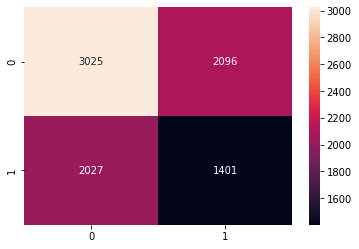

In [ ]:
cf_matrix_textrank = confusion_matrix(businessTarget,y_pred_textrank)
sns.heatmap(cf_matrix_textrank, annot=True, fmt='g')
print(classification_report(businessTarget, y_pred_textrank))

In [ ]:
precision_2,recall_2,fscore_2,support=score(businessTarget, y_pred_textrank,average='weighted')

**TextRank did not perform as well as the feature vectors approach did. The reason for this could be because it uses the general similarity score for predicting the most representative sentence, whereas the feature vectors approach introduces the element of uniqueness by assigning weights to the different features.**

<a name='tfhub'></a>

### Below cells use the pre-trained model TFHub to extract the most important sentence from each article. 



In [ ]:
import tensorflow_hub as hub
from scipy.spatial import distance

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
df_tfhub = pd.DataFrame(columns=['sentence', 'title', 'document_number', 'target_value', 'similarity_score'])
docNum = 0 # represents document number, i.e a document number of 510 corresponds to 510.txt
for nextDoc in documents: # loop through documents
  docNum += 1
  title = nextDoc[0]
  title_embed =  embed([str(title)])
  # topic_name ='Ad sales boost Time Warner profit'
  # topic_embed = embed([topic_name])

  for nextSent in nextDoc[1:]: # loop through sentences in current document
    # also determine whether current sentence appears in summary or not (corresponding to value of 1 or 0 respectively)
    myTargetVal = in_summ(nextSent, docNum)
    # print(type(nextSent))
    embeddings = embed([nextSent])
    # print((embeddings))
    similarity_score = (1 - distance.cosine(title_embed, embeddings))
    df_tfhub = df_tfhub.append({'sentence':nextSent, 'title':title, 
                                'document_number':docNum, 'target_value': myTargetVal , 
                                'similarity_score': similarity_score}, 
                               ignore_index=True)
    
df_tfhub['target_value'] = df_tfhub['target_value'].astype(int)
df_tfhub.head()

sentence  \
0  Quarterly profits at US media giant TimeWarner...   
1  The  which is now one of the biggest investors...   
2  TimeWarner  fourth quarter  rose 2 to 111bn fr...   
3  Its profits were buoyed by oneoff gains which ...   
4  Time Warner  on Friday that it now owns 8 of s...   

                          title document_number  target_value  \
0  Ad  boost Time Warner profit               1             1   
1  Ad  boost Time Warner profit               1             0   
2  Ad  boost Time Warner profit               1             1   
3  Ad  boost Time Warner profit               1             1   
4  Ad  boost Time Warner profit               1             0   

   similarity_score  
0          0.253023  
1          0.305811  
2          0.172785  
3          0.446528  
4          0.413094

In [ ]:
def label_pred(row):
   threshold_tfhub = 0.5
   if row['similarity_score'] > threshold_tfhub:
      return 1
   else:
     return 0

df_tfhub['pred'] = df_tfhub.apply(lambda row:label_pred(row), axis=1)

In [ ]:
pip install seaborn[stats,statsmodels,fastcluster]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import metrics

y_target_tfhub = np.array(df_tfhub['target_value'])
y_pred_tfhub = np.array(df_tfhub['pred'])


In [ ]:
y_target_tfhub

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
y_pred_tfhub

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cf_matrix_tfhub = metrics.confusion_matrix(y_target_tfhub, y_pred_tfhub)

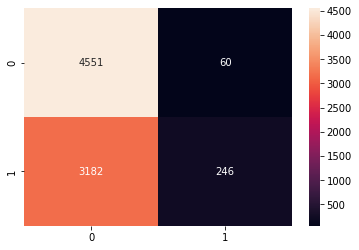

In [ ]:
import seaborn as  sns
sns.heatmap(cf_matrix_tfhub, annot=True, fmt='g')

In [ ]:
classification_report_tfhub = metrics.classification_report(y_target_tfhub, y_pred_tfhub, output_dict=True)
print(metrics.classification_report(y_target_tfhub, y_pred_tfhub))

              precision    recall  f1-score   support

           0       0.59      0.99      0.74      4611
           1       0.80      0.07      0.13      3428

    accuracy                           0.60      8039
   macro avg       0.70      0.53      0.43      8039
weighted avg       0.68      0.60      0.48      8039



In [ ]:
precision_3,recall_3,fscore_3,support=score(y_target_tfhub, y_pred_tfhub,average='weighted')

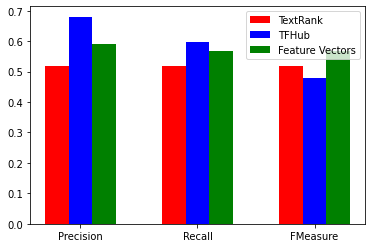

In [ ]:
x=np.arange(3)
x1=[precision_2,recall_2,fscore_2] #textrank
# x1=[0, 0, 0] #textrank
x2=[precision_3,recall_3,fscore_3] #tfhub
x3=[precision_1,recall_1,fscore_1] #feature vectors

width = 0.2

plt.bar(x-0.2, x1, width, color='red')
plt.bar(x, x2, width, color='blue')
plt.bar(x+0.2, x3, width, color='green')
plt.xticks(x, ['Precision', 'Recall', 'FMeasure'])
plt.legend(["TextRank", "TFHub", "Feature Vectors"])
plt.show()

**Overall, TFHub does better than the Feature Vectors. The threshold for TFHub was set to 0.5. The feature vectors found that proper nouns and numerical features were the most important weights. For the TFHub, the similarity between the title and each sentence were compared. The title tends to contain proper nouns and numerical data, so maybe that’s why it gives better results.  Also, it's a pretrained model on a lot more data than just the 510 samples, so it makes sense it performs better than the feature vectors.**